In [651]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", message="'force_all_finite' was renamed")
from main import evaluate_clustering

# data imports

In [652]:
nba = pd.read_csv('nba_players_stats_pergame.csv')

In [653]:
nba.head(10)

Rk                   Player  Age Team Pos   G  GS    MP    FG   FGA  ...  \
0   1  Shai Gilgeous-Alexander   26  OKC  PG  76  76  34.2  11.3  21.8  ...   
1   2    Giannis Antetokounmpo   30  MIL  PF  67  67  34.2  11.8  19.7  ...   
2   3             Nikola Jokić   29  DEN   C  70  70  36.7  11.2  19.5  ...   
3   4              Luka Dončić   25  2TM  PG  50  50  35.4   9.2  20.5  ...   
4   5          Anthony Edwards   23  MIN  SG  79  79  36.3   9.1  20.4  ...   
5   6             Jayson Tatum   26  BOS  PF  72  72  36.4   9.2  20.3  ...   
6   7             Kevin Durant   36  PHO  PF  62  62  36.5   9.5  18.1  ...   
7   8             Tyrese Maxey   24  PHI  PG  52  52  37.7   9.2  21.0  ...   
8   9          Cade Cunningham   23  DET  PG  70  70  35.0   9.8  20.8  ...   
9  10            Jalen Brunson   28  NYK  PG  65  65  35.4   9.0  18.5  ...   

   DRB   TRB   AST  STL  BLK  TOV   PF   PTS                    Awards  \
0  4.1   5.0   6.4  1.7  1.0  2.4  2.2  32.7  MVP-1DPOY-10CPOY-8ASNBA1   
1  9.7  11.9   6.5  0.9  1.2  3.1  2.3  30.4         MVP-3DPOY-8ASNBA1   
2  9.9  12.7  10.2  1.8  0.6  3.3  2.3  29.6         MVP-2CPOY-2ASNBA1   
3  7.4   8.2   7.7  1.8  0.4  3.6  2.5  28.2                       NaN   
4  4.9   5.7   4.5  1.2  0.6  3.2  1.9  27.6         MVP-7CPOY-3ASNBA2   
5  8.0   8.7   6.0  1.1  0.5  2.9  2.2  26.8        MVP-4CPOY-10ASNBA1   
6  5.7   6.0   4.2  0.8  1.2  3.1  1.7  26.6                        AS   
7  3.1   3.3   6.1  1.8  0.4  2.4  2.2  26.3                   CPOY-10   
8  5.3   6.1   9.1  1.0  0.8  4.4  2.8  26.1               MVP-7ASNBA3   
9  2.5   2.9   7.3  0.9  0.1  2.5  2.1  26.0        MVP-10CPOY-1ASNBA2   

   Player-additional  
0          gilgesh01  
1          antetgi01  
2          jokicni01  
3          doncilu01  
4          edwaran01  
5          tatumja01  
6          duranke01  
7          maxeyty01  
8          cunnica01  
9          brunsja01  

[10 rows x 32 columns]

In [654]:
nba['Player'].is_unique

True

In [655]:
nba.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Player-additional'],
      dtype='object')

In [656]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 569 non-null    int64  
 1   Player             569 non-null    object 
 2   Age                569 non-null    int64  
 3   Team               569 non-null    object 
 4   Pos                569 non-null    object 
 5   G                  569 non-null    int64  
 6   GS                 569 non-null    int64  
 7   MP                 569 non-null    float64
 8   FG                 569 non-null    float64
 9   FGA                569 non-null    float64
 10  FG%                566 non-null    float64
 11  3P                 569 non-null    float64
 12  3PA                569 non-null    float64
 13  3P%                541 non-null    float64
 14  2P                 569 non-null    float64
 15  2PA                569 non-null    float64
 16  2P%                561 non

In [657]:
nba.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Player-additional'],
      dtype='object')

In [658]:
nba

Rk                   Player  Age Team Pos   G  GS    MP    FG   FGA  \
0      1  Shai Gilgeous-Alexander   26  OKC  PG  76  76  34.2  11.3  21.8   
1      2    Giannis Antetokounmpo   30  MIL  PF  67  67  34.2  11.8  19.7   
2      3             Nikola Jokić   29  DEN   C  70  70  36.7  11.2  19.5   
3      4              Luka Dončić   25  2TM  PG  50  50  35.4   9.2  20.5   
4      5          Anthony Edwards   23  MIN  SG  79  79  36.3   9.1  20.4   
..   ...                      ...  ...  ...  ..  ..  ..   ...   ...   ...   
564  565              Riley Minix   24  SAS  SF   1   0   7.0   0.0   1.0   
565  566            Jahlil Okafor   29  IND   C   1   0   3.0   0.0   0.0   
566  567              Zyon Pullin   23  MEM  SG   3   0   1.0   0.0   0.3   
567  568           Isaiah Stevens   24  MIA  PG   3   0   2.0   0.0   0.7   
568  569             Terry Taylor   25  SAC  PF   3   0   2.0   0.0   0.3   

     ...  DRB   TRB   AST  STL  BLK  TOV   PF   PTS                    Awards  \
0    ...  4.1   5.0   6.4  1.7  1.0  2.4  2.2  32.7  MVP-1DPOY-10CPOY-8ASNBA1   
1    ...  9.7  11.9   6.5  0.9  1.2  3.1  2.3  30.4         MVP-3DPOY-8ASNBA1   
2    ...  9.9  12.7  10.2  1.8  0.6  3.3  2.3  29.6         MVP-2CPOY-2ASNBA1   
3    ...  7.4   8.2   7.7  1.8  0.4  3.6  2.5  28.2                       NaN   
4    ...  4.9   5.7   4.5  1.2  0.6  3.2  1.9  27.6         MVP-7CPOY-3ASNBA2   
..   ...  ...   ...   ...  ...  ...  ...  ...   ...                       ...   
564  ...  2.0   2.0   0.0  0.0  0.0  0.0  0.0   0.0                       NaN   
565  ...  1.0   1.0   1.0  0.0  0.0  0.0  0.0   0.0                       NaN   
566  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0                       NaN   
567  ...  0.7   0.7   0.0  0.3  0.0  0.0  0.0   0.0                       NaN   
568  ...  0.0   0.3   0.7  0.0  0.0  0.0  0.0   0.0                       NaN   

     Player-additional  
0            gilgesh01  
1            antetgi01  
2            jokicni01  
3            doncilu01  
4            edwaran01  
..                 ...  
564          minixri01  
565          okafoja01  
566          pullizy01  
567          steveis01  
568          taylote01  

[569 rows x 32 columns]

<Axes: >

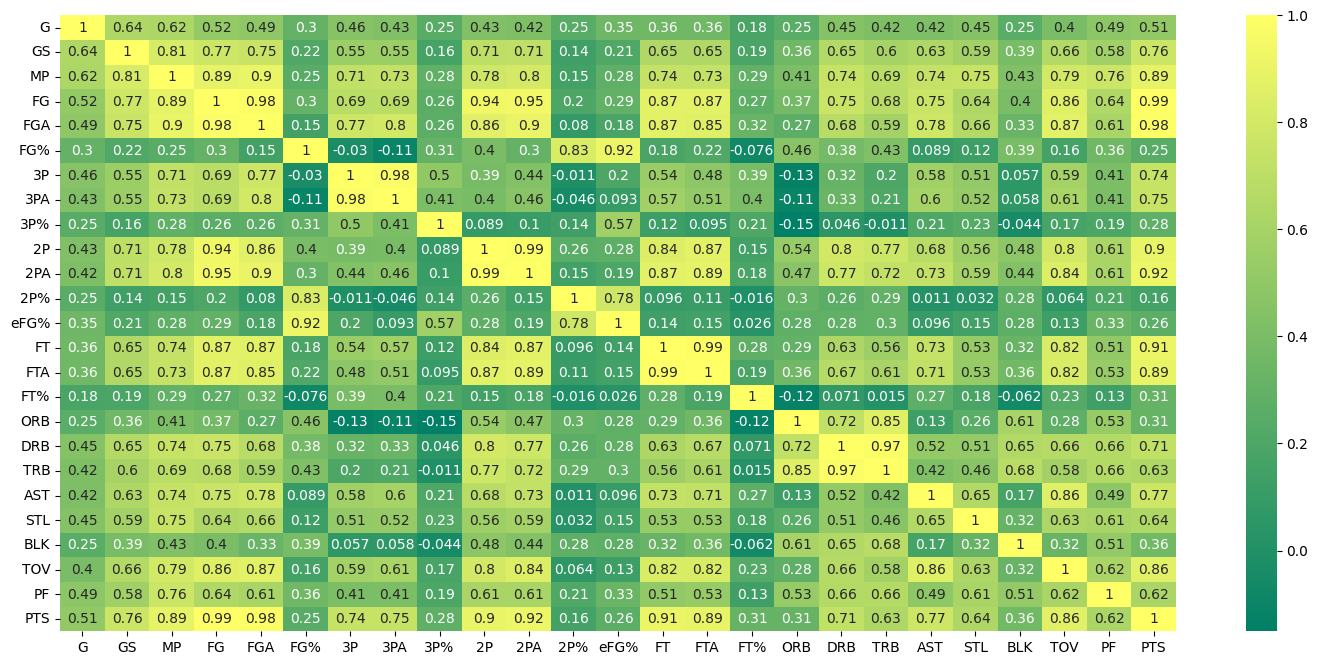

In [659]:
plt.figure(figsize=(18,8))
sns.heatmap(nba.iloc[:,5:-2].corr(),cmap='summer',annot=True)

In [660]:
nba.drop(['Rk', 'Team', 'Pos', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'eFG%', 'TOV', 'Awards', 'Player-additional'], axis=1, inplace=True)

In [661]:
for i in nba.columns:
    nba.loc[:,i] = nba.loc[:,i].fillna(0.0)

In [662]:
nba

Player  Age   G    FG%    3P%    2P%    FT%   TRB   AST  \
0    Shai Gilgeous-Alexander   26  76  0.519  0.375  0.571  0.898   5.0   6.4   
1      Giannis Antetokounmpo   30  67  0.601  0.222  0.620  0.617  11.9   6.5   
2               Nikola Jokić   29  70  0.576  0.417  0.627  0.800  12.7  10.2   
3                Luka Dončić   25  50  0.450  0.368  0.522  0.782   8.2   7.7   
4            Anthony Edwards   23  79  0.447  0.395  0.501  0.837   5.7   4.5   
..                       ...  ...  ..    ...    ...    ...    ...   ...   ...   
564              Riley Minix   24   1  0.000  0.000  0.000  0.000   2.0   0.0   
565            Jahlil Okafor   29   1  0.000  0.000  0.000  0.000   1.0   1.0   
566              Zyon Pullin   23   3  0.000  0.000  0.000  0.000   0.0   0.0   
567           Isaiah Stevens   24   3  0.000  0.000  0.000  0.000   0.7   0.0   
568             Terry Taylor   25   3  0.000  0.000  0.000  0.000   0.3   0.7   

     STL  BLK   PF   PTS  
0    1.7  1.0  2.2  32.7  
1    0.9  1.2  2.3  30.4  
2    1.8  0.6  2.3  29.6  
3    1.8  0.4  2.5  28.2  
4    1.2  0.6  1.9  27.6  
..   ...  ...  ...   ...  
564  0.0  0.0  0.0   0.0  
565  0.0  0.0  0.0   0.0  
566  0.0  0.0  0.0   0.0  
567  0.3  0.0  0.0   0.0  
568  0.0  0.0  0.0   0.0  

[569 rows x 13 columns]

In [663]:
nba.iloc[:,1:].corr()

Age         G       FG%       3P%       2P%       FT%       TRB  \
Age  1.000000  0.116564  0.062651  0.142944  0.005519  0.042012  0.097825   
G    0.116564  1.000000  0.325679  0.304097  0.312922  0.362938  0.416301   
FG%  0.062651  0.325679  1.000000  0.175737  0.820250  0.194235  0.436993   
3P%  0.142944  0.304097  0.175737  1.000000  0.130193  0.269777 -0.049463   
2P%  0.005519  0.312922  0.820250  0.130193  1.000000  0.323537  0.322617   
FT%  0.042012  0.362938  0.194235  0.269777  0.323537  1.000000  0.172359   
TRB  0.097825  0.416301  0.436993 -0.049463  0.322617  0.172359  1.000000   
AST  0.187391  0.415527  0.102405  0.240218  0.057858  0.303441  0.424014   
STL  0.127759  0.450858  0.145624  0.275808  0.108007  0.302627  0.464302   
BLK  0.013005  0.254284  0.394547 -0.085481  0.298958  0.088706  0.681133   
PF   0.058168  0.485626  0.373425  0.156564  0.278914  0.287483  0.659309   
PTS  0.138218  0.508472  0.269252  0.303011  0.211721  0.378004  0.631934   

          AST       STL       BLK        PF       PTS  
Age  0.187391  0.127759  0.013005  0.058168  0.138218  
G    0.415527  0.450858  0.254284  0.485626  0.508472  
FG%  0.102405  0.145624  0.394547  0.373425  0.269252  
3P%  0.240218  0.275808 -0.085481  0.156564  0.303011  
2P%  0.057858  0.108007  0.298958  0.278914  0.211721  
FT%  0.303441  0.302627  0.088706  0.287483  0.378004  
TRB  0.424014  0.464302  0.681133  0.659309  0.631934  
AST  1.000000  0.652099  0.166930  0.491791  0.771401  
STL  0.652099  1.000000  0.316152  0.611330  0.636596  
BLK  0.166930  0.316152  1.000000  0.512960  0.363315  
PF   0.491791  0.611330  0.512960  1.000000  0.620318  
PTS  0.771401  0.636596  0.363315  0.620318  1.000000

<Axes: >

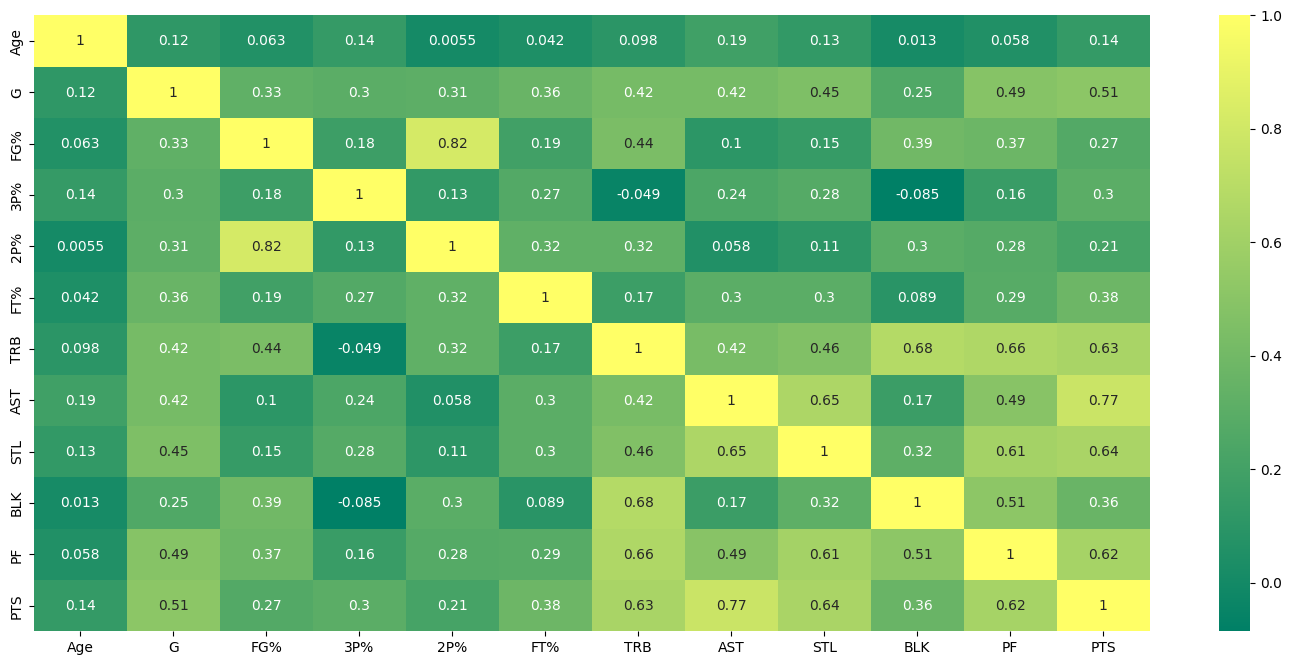

In [664]:
plt.figure(figsize=(18,8))
sns.heatmap(nba.iloc[:,1:].corr(),cmap='summer',annot=True)

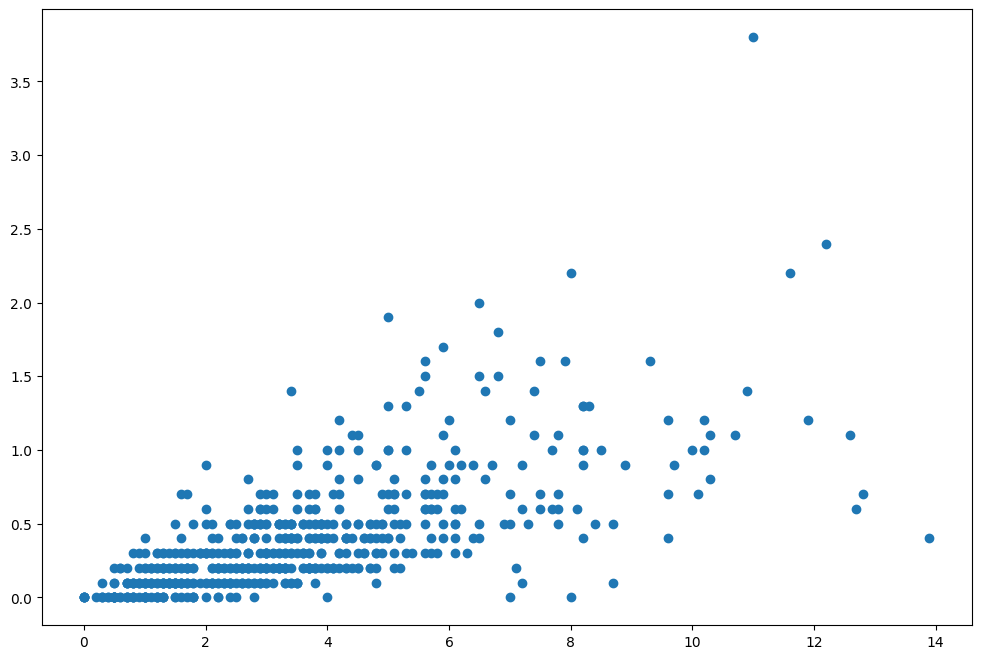

In [854]:
plt.figure(figsize=(12,8))
plt.scatter(nba.iloc[:,7], nba.iloc[:,10])

# data standardization

In [666]:
nba

Player  Age   G    FG%    3P%    2P%    FT%   TRB   AST  \
0    Shai Gilgeous-Alexander   26  76  0.519  0.375  0.571  0.898   5.0   6.4   
1      Giannis Antetokounmpo   30  67  0.601  0.222  0.620  0.617  11.9   6.5   
2               Nikola Jokić   29  70  0.576  0.417  0.627  0.800  12.7  10.2   
3                Luka Dončić   25  50  0.450  0.368  0.522  0.782   8.2   7.7   
4            Anthony Edwards   23  79  0.447  0.395  0.501  0.837   5.7   4.5   
..                       ...  ...  ..    ...    ...    ...    ...   ...   ...   
564              Riley Minix   24   1  0.000  0.000  0.000  0.000   2.0   0.0   
565            Jahlil Okafor   29   1  0.000  0.000  0.000  0.000   1.0   1.0   
566              Zyon Pullin   23   3  0.000  0.000  0.000  0.000   0.0   0.0   
567           Isaiah Stevens   24   3  0.000  0.000  0.000  0.000   0.7   0.0   
568             Terry Taylor   25   3  0.000  0.000  0.000  0.000   0.3   0.7   

     STL  BLK   PF   PTS  
0    1.7  1.0  2.2  32.7  
1    0.9  1.2  2.3  30.4  
2    1.8  0.6  2.3  29.6  
3    1.8  0.4  2.5  28.2  
4    1.2  0.6  1.9  27.6  
..   ...  ...  ...   ...  
564  0.0  0.0  0.0   0.0  
565  0.0  0.0  0.0   0.0  
566  0.0  0.0  0.0   0.0  
567  0.3  0.0  0.0   0.0  
568  0.0  0.0  0.0   0.0  

[569 rows x 13 columns]

In [667]:
scaler = StandardScaler()

In [668]:
nba_scaled = scaler.fit_transform(nba.iloc[:,1:])

In [669]:
np.mean(nba_scaled),np.std(nba_scaled)

(-1.665009339801055e-17, 1.0)

In [670]:
nba_scaled = pd.DataFrame(nba_scaled)

In [671]:
nba_scaled

0         1         2         3         4         5         6   \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

           7         8         9         10        11  
0    2.373533  2.450903  1.472692  0.859607  3.628630  
1    2.428543  0.549657  1.966191  0.990703  3.278153  
2    4.463898  2.688559  0.485693  0.990703  3.156248  
3    3.088658  2.688559 -0.007806  1.252893  2.942914  
4    1.328351  1.262625  0.485693  0.466321  2.851485  
..        ...       ...       ...       ...       ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239  

[569 rows x 12 columns]

In [672]:
nba_scaled.columns = nba.iloc[:,1:].columns

In [673]:
nba_scaled_with_players = nba_scaled.copy()

In [674]:
nba_scaled_with_players['Player'] = nba['Player']

In [675]:
nba_scaled_with_players = nba_scaled_with_players[['Player'] + [c for c in nba_scaled_with_players.columns if c != 'Player']]

In [676]:
nba_scaled_with_players

Player       Age         G       FG%       3P%  \
0    Shai Gilgeous-Alexander  0.045386  1.223223  0.636390  0.552000   
1      Giannis Antetokounmpo  1.001857  0.853396  1.352307 -0.559623   
2               Nikola Jokić  0.762739  0.976672  1.134039  0.857152   
3                Luka Dončić -0.193732  0.154835  0.033971  0.501142   
4            Anthony Edwards -0.671967  1.346499  0.007779  0.697311   
..                       ...       ...       ...       ...       ...   
564              Riley Minix -0.432849 -1.858666 -3.894842 -2.172568   
565            Jahlil Okafor  0.762739 -1.858666 -3.894842 -2.172568   
566              Zyon Pullin -0.671967 -1.776483 -3.894842 -2.172568   
567           Isaiah Stevens -0.432849 -1.776483 -3.894842 -2.172568   
568             Terry Taylor -0.193732 -1.776483 -3.894842 -2.172568   

          2P%       FT%       TRB       AST       STL       BLK        PF  \
0    0.398600  0.887690  0.580232  2.373533  2.450903  1.472692  0.859607   
1    0.761533 -0.515561  3.430998  2.428543  0.549657  1.966191  0.990703   
2    0.813381  0.398300  3.761521  4.463898  2.688559  0.485693  0.990703   
3    0.035667  0.308412  1.902326  3.088658  2.688559 -0.007806  1.252893   
4   -0.119876  0.583069  0.869440  1.328351  1.262625  0.485693  0.466321   
..        ...       ...       ...       ...       ...       ...       ...   
564 -3.830680 -3.596720 -0.659232 -1.147080 -1.589245 -0.994804 -2.024489   
565 -3.830680 -3.596720 -1.072386 -0.596985 -1.589245 -0.994804 -2.024489   
566 -3.830680 -3.596720 -1.485541 -1.147080 -1.589245 -0.994804 -2.024489   
567 -3.830680 -3.596720 -1.196333 -1.147080 -0.876277 -0.994804 -2.024489   
568 -3.830680 -3.596720 -1.361595 -0.762013 -1.589245 -0.994804 -2.024489   

          PTS  
0    3.628630  
1    3.278153  
2    3.156248  
3    2.942914  
4    2.851485  
..        ...  
564 -1.354239  
565 -1.354239  
566 -1.354239  
567 -1.354239  
568 -1.354239  

[569 rows x 13 columns]

# dimensionality reduction algorithms

## pca 

In [677]:
pca_general = PCA()

In [678]:
pca_general.fit(nba_scaled)

PCA()

In [679]:
explained_variance = pca_general.explained_variance_ratio_

In [680]:
explained_variance

array([0.39202653, 0.1465412 , 0.11823603, 0.08143326, 0.05887562,
       0.04902666, 0.04574275, 0.03532814, 0.02813765, 0.01950584,
       0.01343423, 0.01171209])

In [681]:
eigenvalues = pca_general.explained_variance_

In [682]:
eigenvalues

array([4.71260064, 1.76159029, 1.42133035, 0.97891954, 0.70775133,
       0.58935571, 0.54987941, 0.42468402, 0.33824621, 0.23448215,
       0.16149458, 0.14079252])

In [683]:
selected_components = []

for i in eigenvalues:
    if i > 1:
        selected_components.append(i)
    
print(selected_components)

[4.712600644339717, 1.761590293912855, 1.4213303548836869]


In [684]:
N_COMPONENTS = len(selected_components)

In [685]:
eigenvectors = pca_general.components_

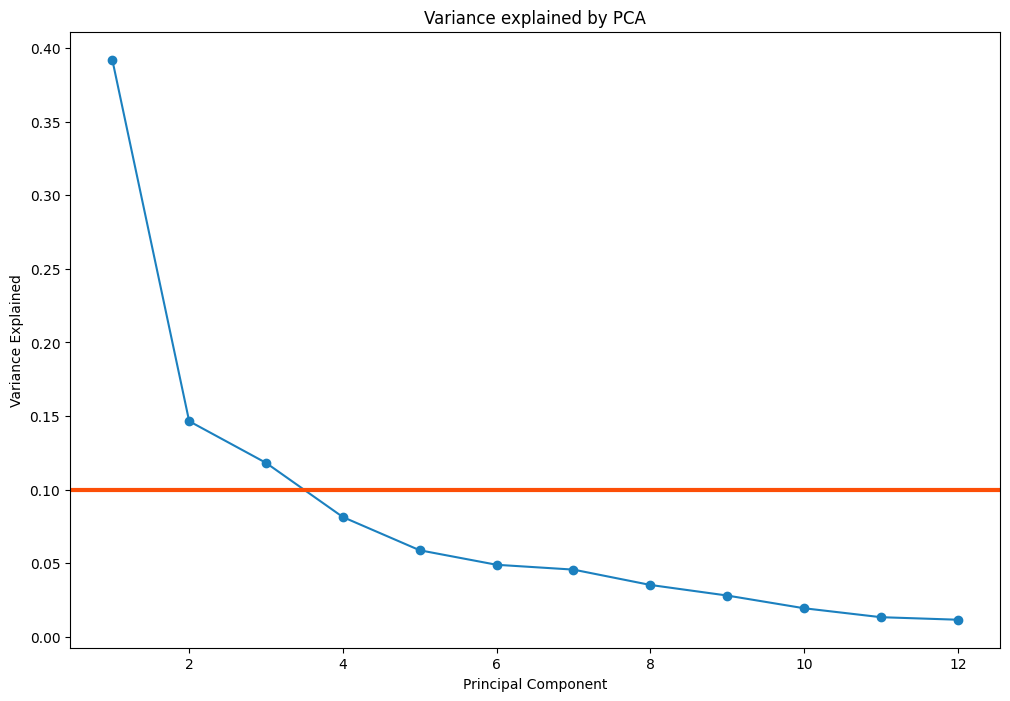

In [686]:
plt.figure(figsize=(12,8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [687]:
pca = PCA(n_components=N_COMPONENTS)

In [688]:
X_pca = pca.fit_transform(nba_scaled)

In [689]:
pd.DataFrame(X_pca).head(8)

0         1         2
0  4.841111 -1.598493 -0.345956
1  5.028404  0.372935 -2.184487
2  6.467211 -1.816487 -0.932607
3  4.378107 -2.360203 -1.069586
4  3.150307 -1.427930 -0.213810
5  3.804442 -1.286625 -0.702374
6  3.432699 -0.497398  0.073107
7  3.154263 -2.319207 -0.210508

In [690]:
pca_columns = [f'dim_{i+1}' for i in range(N_COMPONENTS)]

In [691]:
pca_data = pd.DataFrame(X_pca, columns=pca_columns)

In [692]:
pca_data = pd.concat([pca_data, nba_scaled_with_players[['Player']]], axis=1)

In [693]:
pca_data

dim_1     dim_2     dim_3                   Player
0    4.841111 -1.598493 -0.345956  Shai Gilgeous-Alexander
1    5.028404  0.372935 -2.184487    Giannis Antetokounmpo
2    6.467211 -1.816487 -0.932607             Nikola Jokić
3    4.378107 -2.360203 -1.069586              Luka Dončić
4    3.150307 -1.427930 -0.213810          Anthony Edwards
..        ...       ...       ...                      ...
564 -6.291218 -2.242494 -3.923461              Riley Minix
565 -6.164915 -2.714560 -3.656222            Jahlil Okafor
566 -6.579577 -2.338992 -3.644154              Zyon Pullin
567 -6.215117 -2.537450 -3.782455           Isaiah Stevens
568 -6.372943 -2.544232 -3.648938             Terry Taylor

[569 rows x 4 columns]

## t-SNE

In [694]:
tsne = TSNE(n_components=3,random_state=42)

In [695]:
X_tsne = tsne.fit_transform(nba_scaled)

In [696]:
tsne_data = pd.concat([pd.DataFrame(X_tsne,columns=('dim_1','dim_2','dim_3')),nba_scaled_with_players['Player']],axis=1)

In [697]:
tsne_data

dim_1     dim_2     dim_3                   Player
0    10.946491 -1.444365  0.194213  Shai Gilgeous-Alexander
1     9.569417  2.272487 -0.180859    Giannis Antetokounmpo
2    11.015214 -0.149291 -1.097451             Nikola Jokić
3    10.863584 -1.088748 -0.879711              Luka Dončić
4     9.589811 -1.195993  0.609520          Anthony Edwards
..         ...       ...       ...                      ...
564 -13.335308  0.144288  1.360901              Riley Minix
565 -13.849236 -0.055960  1.217238            Jahlil Okafor
566 -13.253670  0.289258  1.037812              Zyon Pullin
567 -13.278198 -0.061063  1.363481           Isaiah Stevens
568 -13.438334  0.255225  1.090845             Terry Taylor

[569 rows x 4 columns]

## umap

In [698]:
umap = umap.UMAP(n_components=3,random_state=42)

In [699]:
X_umap = umap.fit_transform(nba_scaled)

In [700]:
umap_data = pd.concat([pd.DataFrame(X_umap,columns=('dim_1','dim_2','dim_3')),nba_scaled_with_players['Player']],axis=1)

In [701]:
umap_data

dim_1      dim_2     dim_3                   Player
0    9.261564  15.978666  8.299086  Shai Gilgeous-Alexander
1    9.214653  15.379135  7.829131    Giannis Antetokounmpo
2    9.299294  15.749483  8.293201             Nikola Jokić
3    9.232659  16.000080  8.498590              Luka Dončić
4    9.191334  15.991031  8.128841          Anthony Edwards
..        ...        ...       ...                      ...
564  0.895058  13.327366  3.688583              Riley Minix
565  0.945174  13.381003  3.665638            Jahlil Okafor
566  0.923121  13.356359  3.684239              Zyon Pullin
567  0.992209  13.426870  3.713835           Isaiah Stevens
568  0.930482  13.364857  3.682084             Terry Taylor

[569 rows x 4 columns]

# clustering algorithms

## k-means 

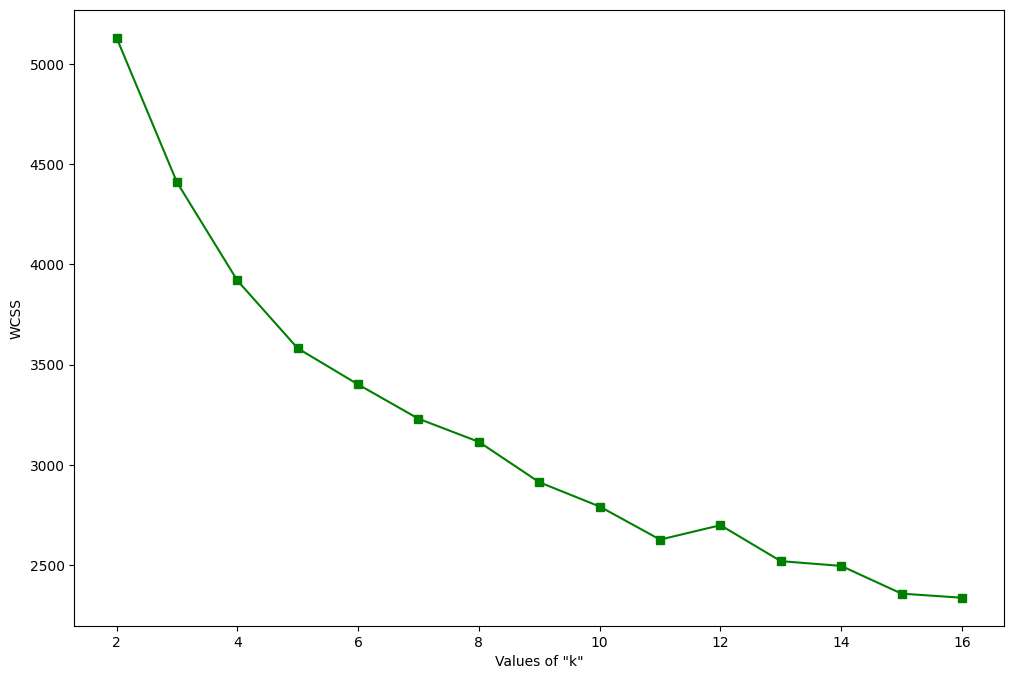

In [702]:
limit = int((nba_scaled.shape[0]//2)**0.5)
wcss = {}

for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(nba_scaled)
    wcss[k] = model.inertia_
    
plt.figure(figsize=(12,8))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2238839123886907
For n_clusters = 3 The average silhouette_score is : 0.20565600683872387
For n_clusters = 4 The average silhouette_score is : 0.21182767860278573
For n_clusters = 5 The average silhouette_score is : 0.1731151224471042
For n_clusters = 6 The average silhouette_score is : 0.16772675157554032


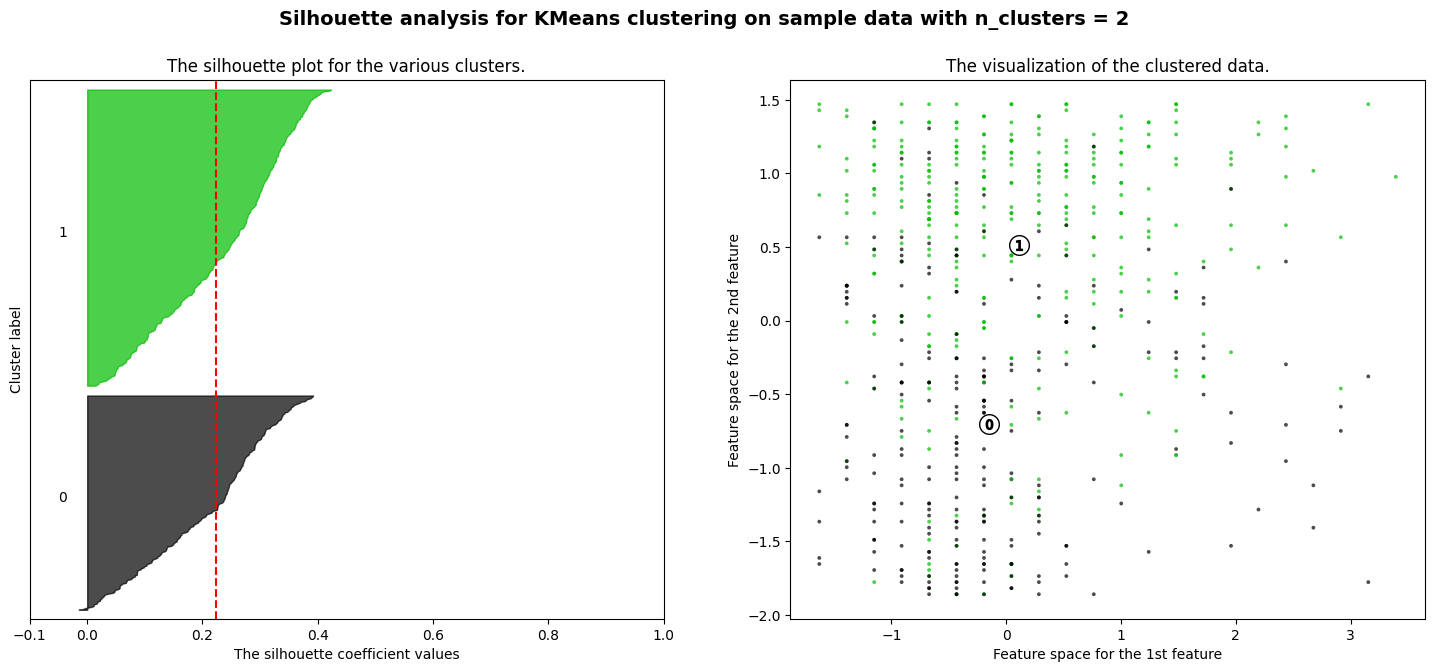

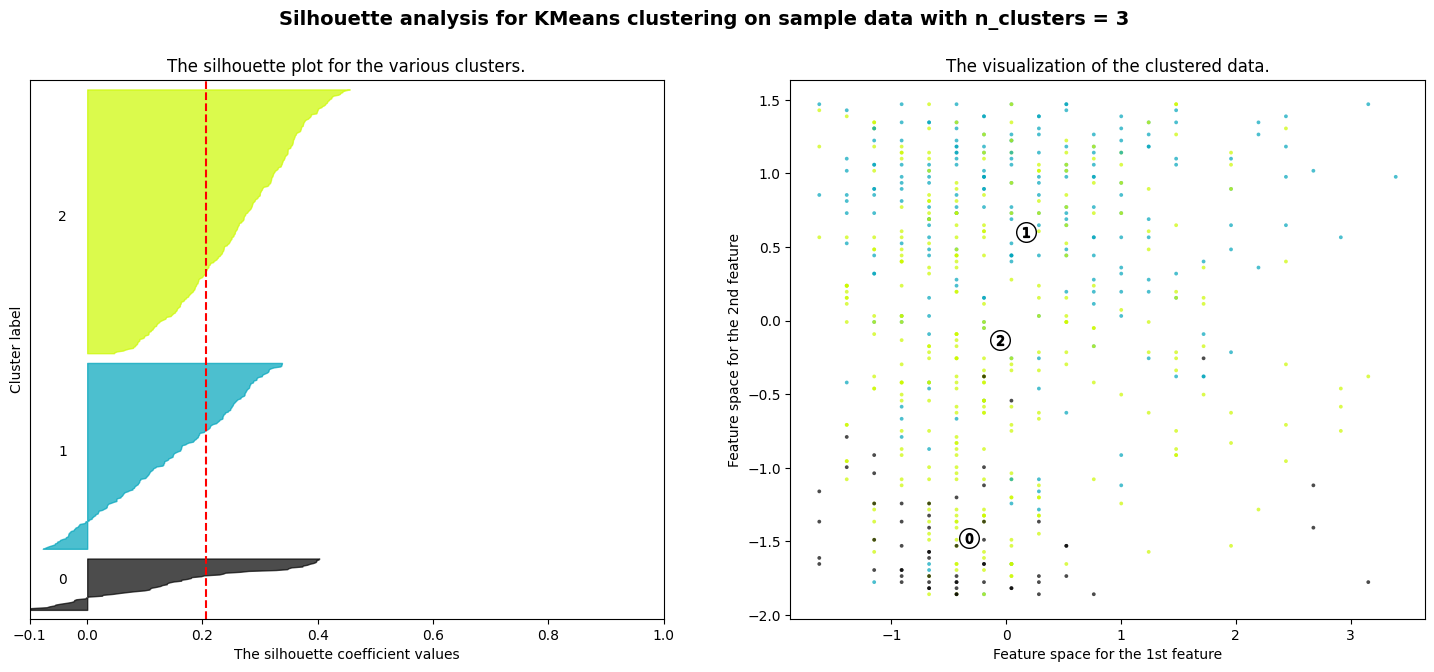

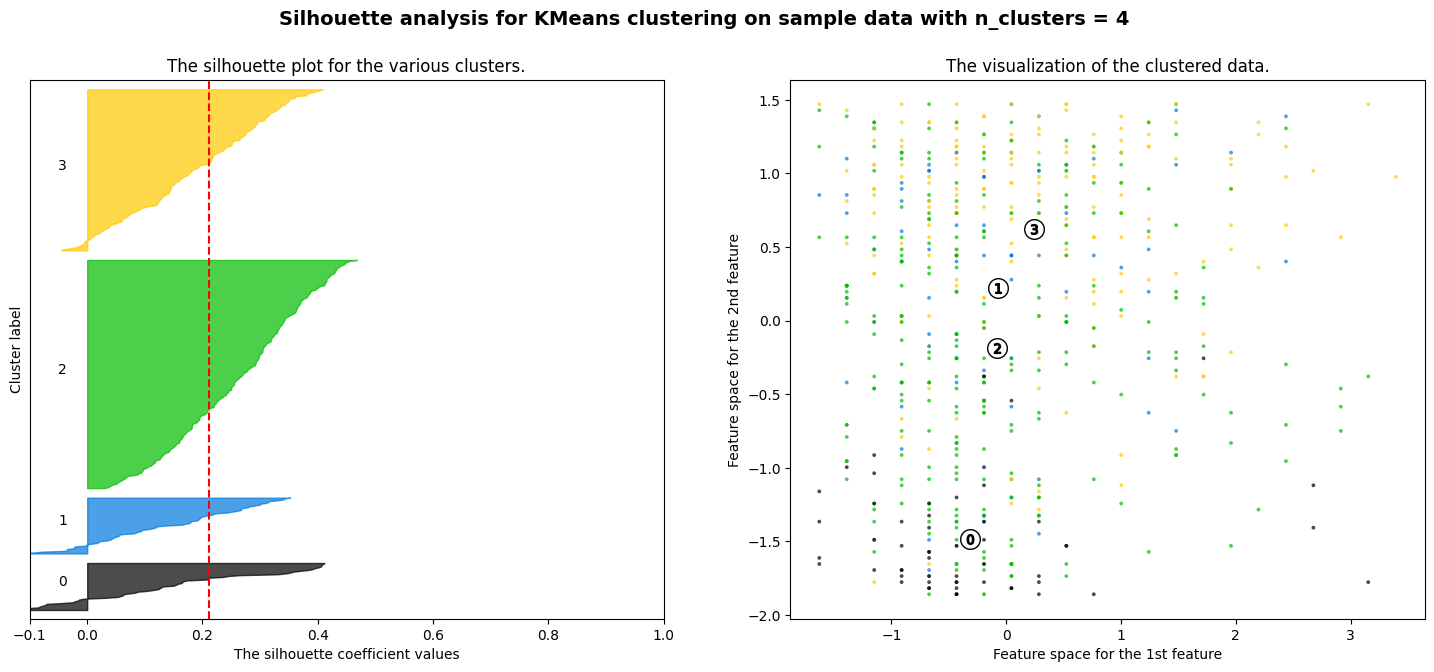

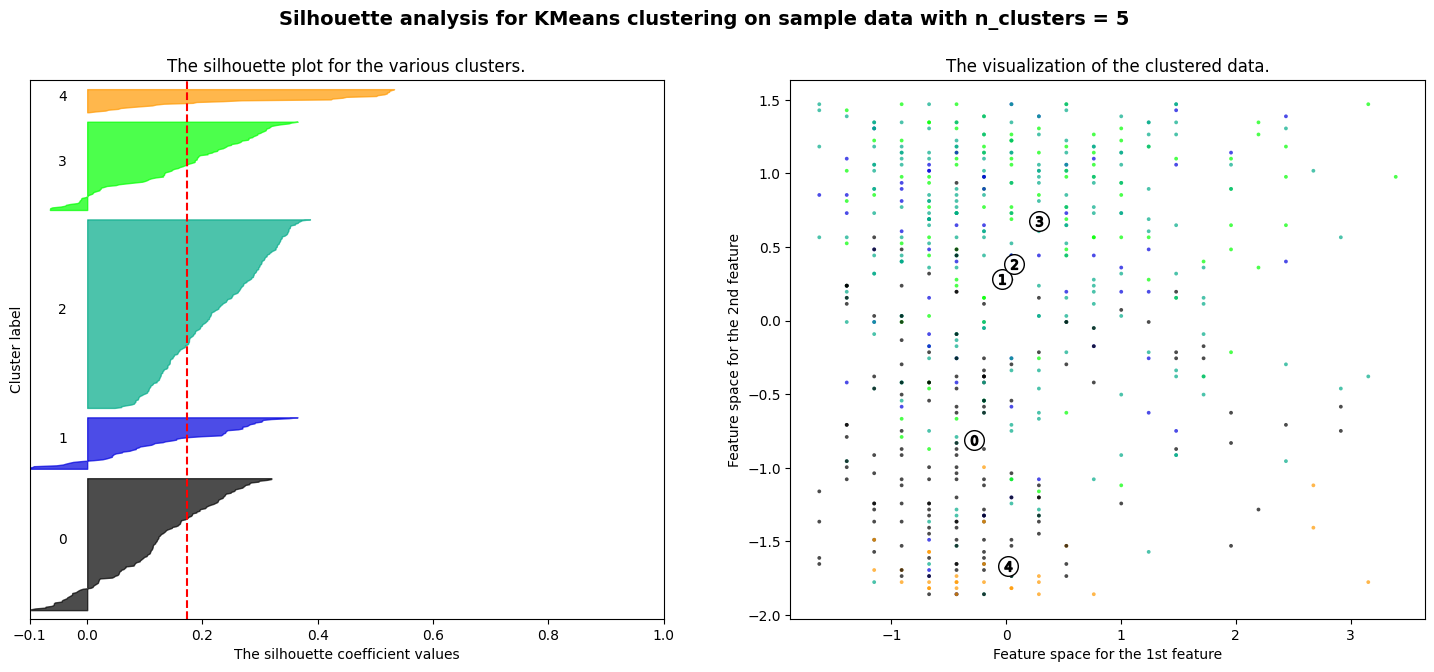

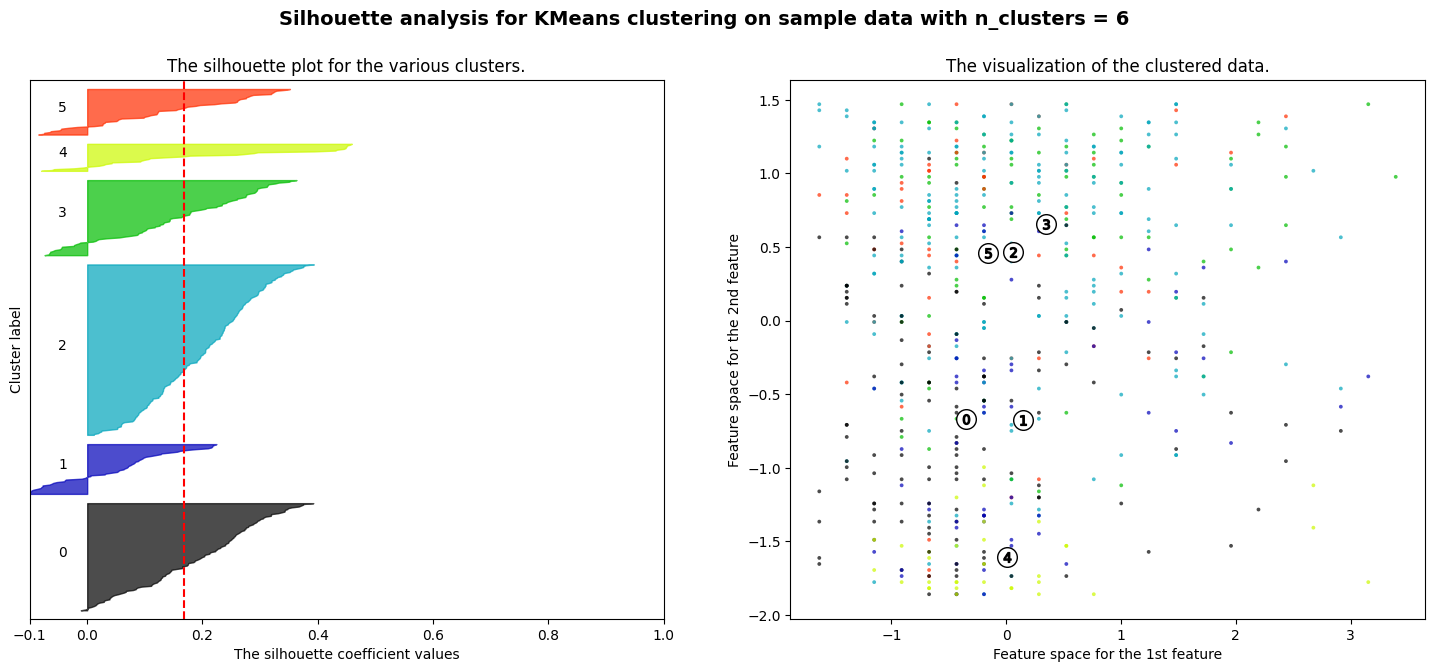

In [703]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(nba_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(nba_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(nba_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(nba_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        nba_scaled.values[:, 0], nba_scaled.values[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [704]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [705]:
kmeans.fit(nba_scaled)

KMeans(n_clusters=5, random_state=42)

In [706]:
df_kmeans = nba_scaled.copy()

In [707]:
df_kmeans['k_means'] = kmeans.labels_

In [708]:
df_kmeans

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  k_means  
0    2.373533  2.450903  1.472692  0.859607  3.628630        2  
1    2.428543  0.549657  1.966191  0.990703  3.278153        2  
2    4.463898  2.688559  0.485693  0.990703  3.156248        2  
3    3.088658  2.688559 -0.007806  1.252893  2.942914        2  
4    1.328351  1.262625  0.485693  0.466321  2.851485        2  
..        ...       ...       ...       ...       ...      ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239        4  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239        4  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239        4  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239        4  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239        4  

[569 rows x 13 columns]

In [709]:
df_kmeans['k_means'].unique()

array([2, 0, 1, 3, 4])

In [710]:
df_kmeans.groupby(df_kmeans['k_means']).mean() 

Age         G       FG%       3P%       2P%       FT%       TRB  \
k_means                                                                         
0       -0.043319  0.299982  1.197971 -1.121412  0.748273 -0.166963  1.457852   
1        0.065944  0.380747 -0.021218  0.437560  0.040694  0.280686 -0.091098   
2        0.282205  0.674805  0.180462  0.388736  0.117284  0.441659  0.802302   
3       -0.269815 -0.819896 -0.088202 -0.166484  0.095883 -0.231208 -0.801153   
4        0.011226 -1.666415 -2.670362 -1.498691 -2.941071 -2.214515 -1.082715   

              AST       STL       BLK        PF       PTS  
k_means                                                    
0       -0.225226 -0.048315  1.822917  0.804632  0.130742  
1       -0.058090  0.185108 -0.152953  0.217181 -0.042725  
2        1.535166  1.191785  0.305376  0.883557  1.572508  
3       -0.702360 -0.848499 -0.571805 -0.966363 -0.831887  
4       -0.881856 -1.113933 -0.818555 -1.462652 -1.217640

### k-means with pca

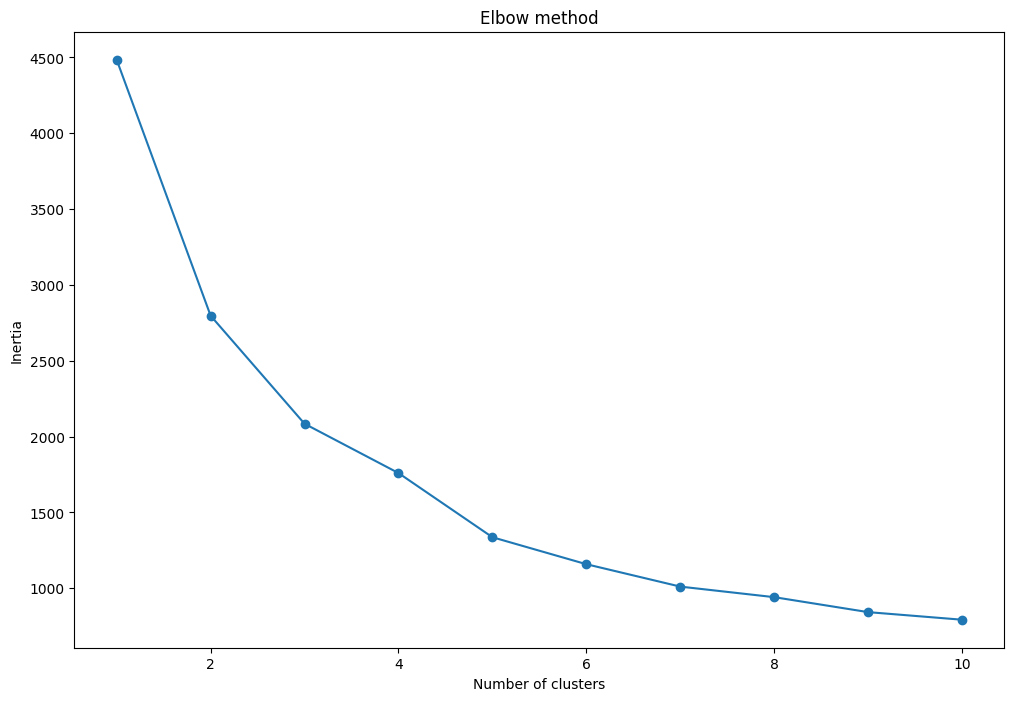

In [711]:
data = X_pca
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [712]:
kmeans_pca = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [713]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [714]:
df_pca_kmeans = nba_scaled.copy()

In [715]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [716]:
df_pca_kmeans

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  kmeans_pca  
0    2.373533  2.450903  1.472692  0.859607  3.628630           2  
1    2.428543  0.549657  1.966191  0.990703  3.278153           2  
2    4.463898  2.688559  0.485693  0.990703  3.156248           2  
3    3.088658  2.688559 -0.007806  1.252893  2.942914           2  
4    1.328351  1.262625  0.485693  0.466321  2.851485           2  
..        ...       ...       ...       ...       ...         ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239           4  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239           4  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239           4  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239           4  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239           4  

[569 rows x 13 columns]

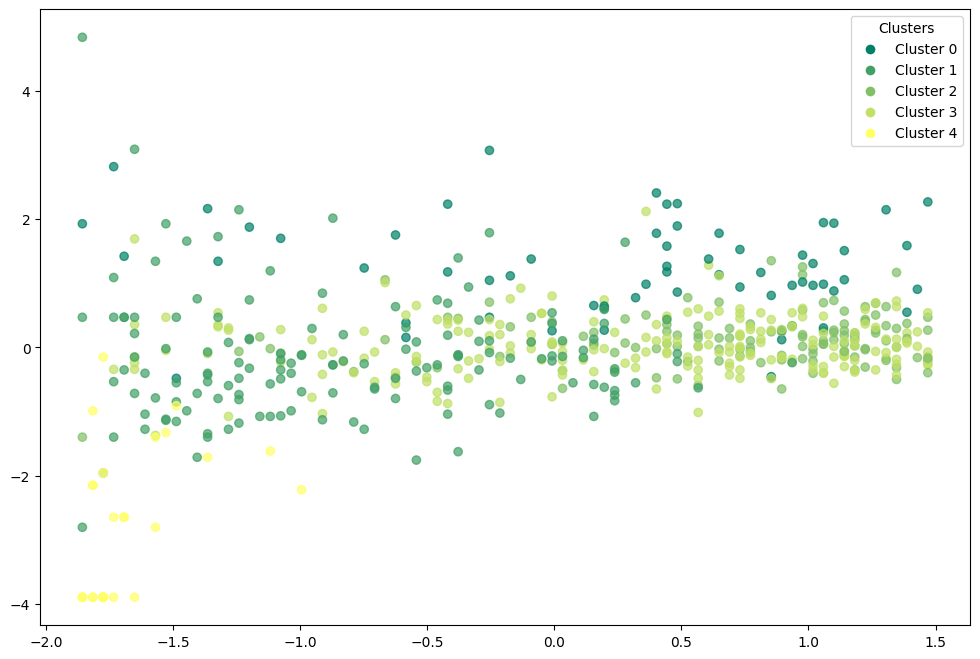

In [717]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_kmeans.iloc[:, 1], df_pca_kmeans.iloc[:, 2], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [718]:
df_pca_kmeans.groupby(df_pca_kmeans['kmeans_pca']).mean() 

Age         G       FG%       3P%       2P%       FT%  \
kmeans_pca                                                               
0          -0.070316  0.266180  1.240497 -1.173794  0.769896 -0.184603   
1          -0.304221 -0.799347 -0.156177 -0.220299  0.011965 -0.299004   
2           0.232197  0.662062  0.107364  0.401241  0.046199  0.412150   
3           0.101989  0.289425  0.029205  0.450002  0.129665  0.292055   
4          -0.087457 -1.676036 -2.742714 -1.473733 -3.045286 -2.163322   

                 TRB       AST       STL       BLK        PF       PTS  
kmeans_pca                                                              
0           1.433862 -0.233211 -0.055982  1.759240  0.772915  0.094613  
1          -0.830192 -0.720661 -0.871360 -0.581286 -1.004658 -0.870507  
2           0.700305  1.311161  1.164220  0.333403  0.925155  1.316720  
3          -0.140693 -0.121564  0.050236 -0.217603  0.090768 -0.074088  
4          -1.075447 -0.878145 -1.096329 -0.830304 -1.461265 -1.216531

### k-means with t-SNE

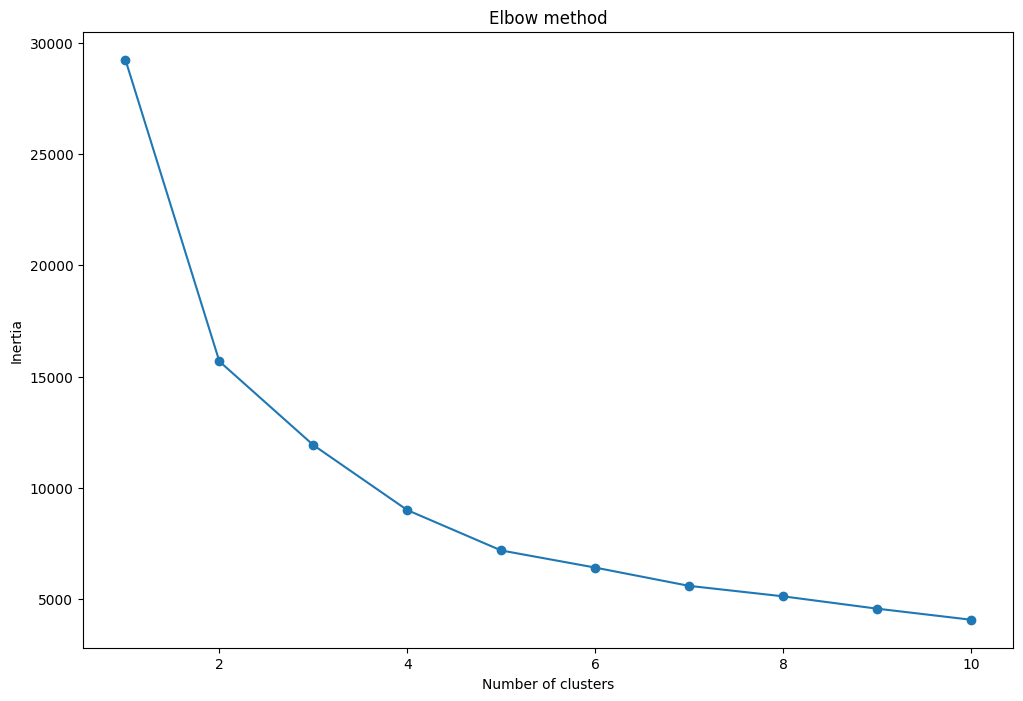

In [719]:
data = X_tsne
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [720]:
kmeans_tsne = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [721]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=5, random_state=42)

In [722]:
df_tsne_kmeans = nba_scaled.copy()

In [723]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [724]:
df_tsne_kmeans

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  kmeans_tsne  
0    2.373533  2.450903  1.472692  0.859607  3.628630            4  
1    2.428543  0.549657  1.966191  0.990703  3.278153            4  
2    4.463898  2.688559  0.485693  0.990703  3.156248            4  
3    3.088658  2.688559 -0.007806  1.252893  2.942914            4  
4    1.328351  1.262625  0.485693  0.466321  2.851485            4  
..        ...       ...       ...       ...       ...          ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239            3  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239            3  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239            3  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239            3  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239            3  

[569 rows x 13 columns]

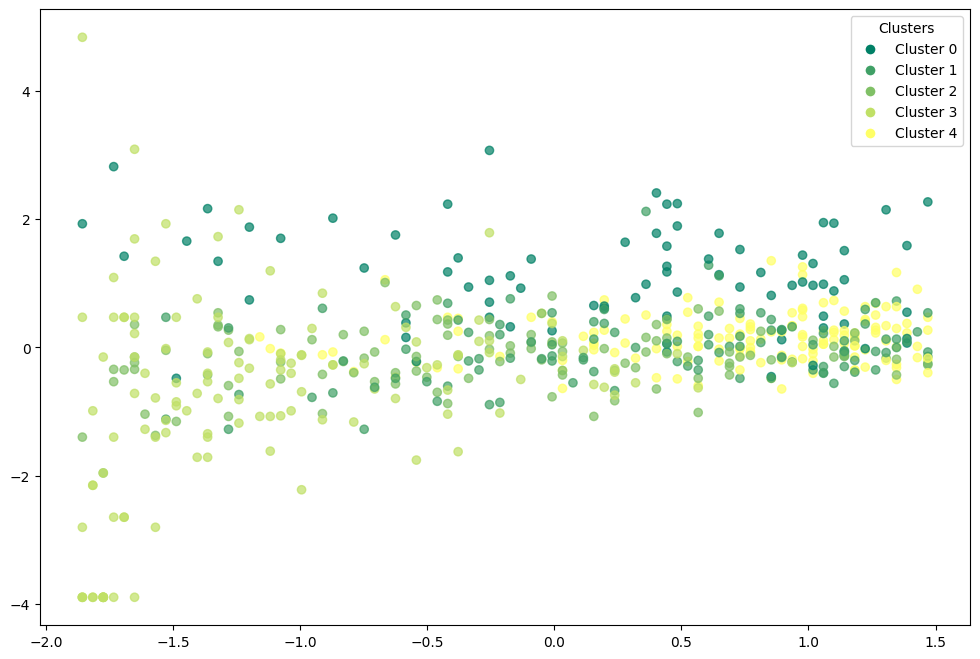

In [725]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 1], df_tsne_kmeans.iloc[:, 2], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [726]:
df_tsne_kmeans.groupby(df_tsne_kmeans['kmeans_tsne']).mean()

Age         G       FG%       3P%       2P%       FT%  \
kmeans_tsne                                                               
0           -0.160437  0.232337  1.102542 -1.031238  0.698904 -0.168146   
1            0.810563  0.389254 -0.014006  0.446062  0.186201  0.255525   
2           -0.481112 -0.239496 -0.155941  0.324770 -0.132990  0.228328   
3           -0.480293 -1.095858 -0.712642 -0.487949 -0.598907 -0.809758   
4            0.270157  0.699713  0.141068  0.404753  0.101291  0.423968   

                  TRB       AST       STL       BLK        PF       PTS  
kmeans_tsne                                                              
0            1.207285 -0.299654 -0.100136  1.585135  0.718555  0.077181  
1           -0.359793 -0.403141 -0.281006 -0.294505 -0.342724 -0.376821  
2           -0.238876 -0.146814  0.141936 -0.191170  0.252239 -0.188731  
3           -0.937619 -0.798250 -1.000764 -0.708888 -1.248322 -0.989491  
4            0.577202  1.217232  0.986944  0.105699  0.726764  1.191443

### k-means with umap

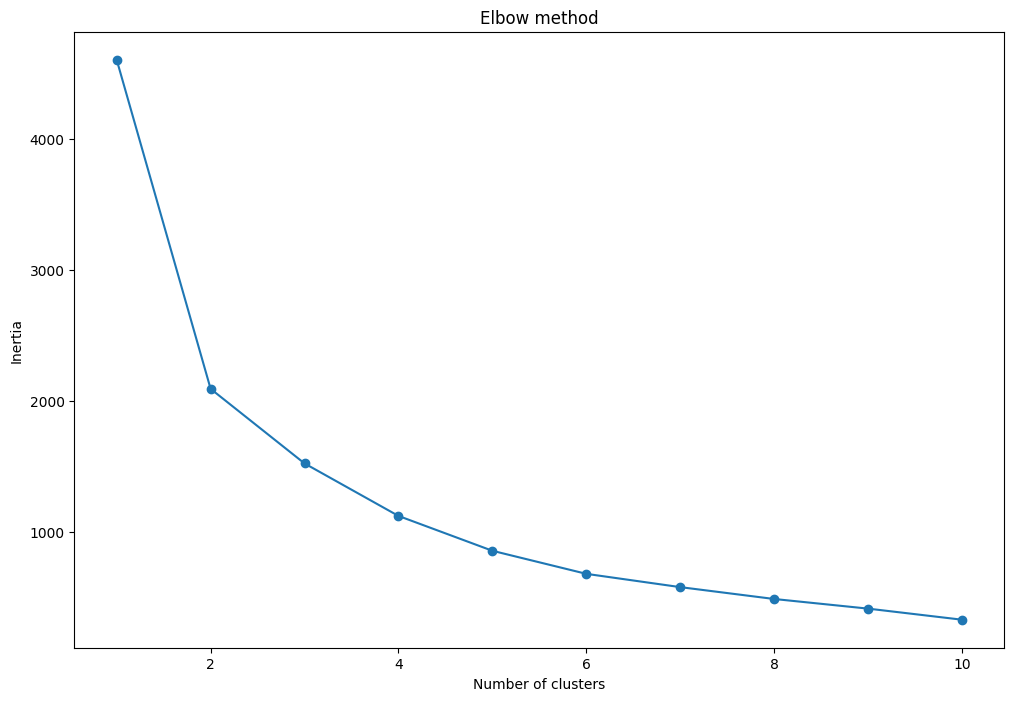

In [727]:
data = X_umap
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [728]:
kmeans_umap = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [729]:
kmeans_umap.fit(X_umap)

KMeans(n_clusters=5, random_state=42)

In [730]:
df_umap_kmeans = nba_scaled.copy()

In [731]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [732]:
df_umap_kmeans

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  kmeans_umap  
0    2.373533  2.450903  1.472692  0.859607  3.628630            2  
1    2.428543  0.549657  1.966191  0.990703  3.278153            2  
2    4.463898  2.688559  0.485693  0.990703  3.156248            2  
3    3.088658  2.688559 -0.007806  1.252893  2.942914            2  
4    1.328351  1.262625  0.485693  0.466321  2.851485            2  
..        ...       ...       ...       ...       ...          ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239            3  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239            3  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239            3  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239            3  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239            3  

[569 rows x 13 columns]

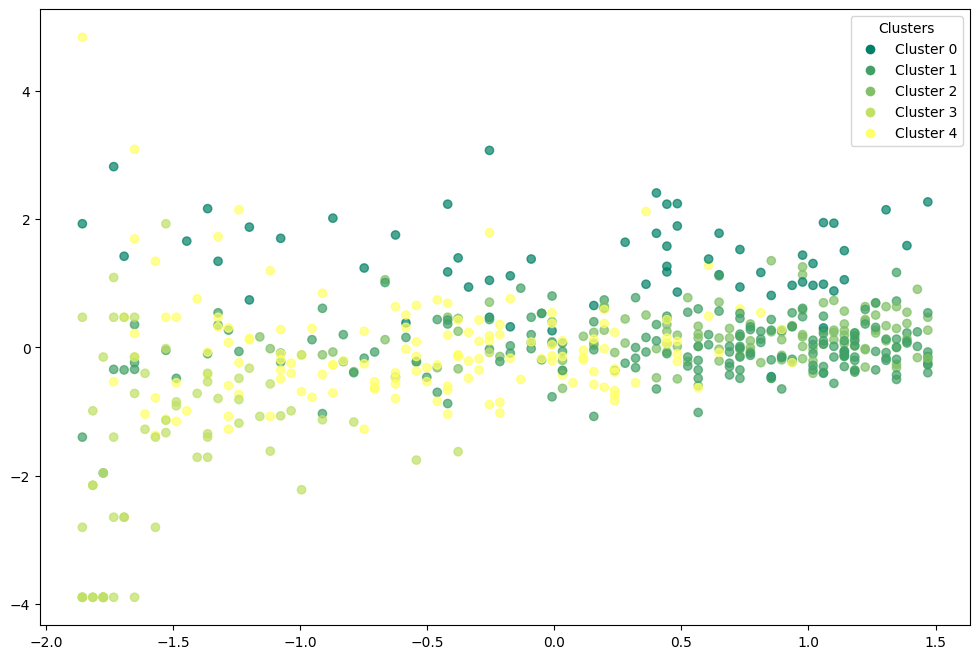

In [733]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_kmeans.iloc[:, 1], df_umap_kmeans.iloc[:, 2], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

## Birch

In [734]:
birch = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [735]:
birch.fit(nba_scaled)

Birch(n_clusters=5, threshold=1.5)

In [736]:
df_birch = nba_scaled.copy()

In [737]:
df_birch['birch'] = birch.labels_

In [738]:
df_birch

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  birch  
0    2.373533  2.450903  1.472692  0.859607  3.628630      3  
1    2.428543  0.549657  1.966191  0.990703  3.278153      3  
2    4.463898  2.688559  0.485693  0.990703  3.156248      3  
3    3.088658  2.688559 -0.007806  1.252893  2.942914      3  
4    1.328351  1.262625  0.485693  0.466321  2.851485      3  
..        ...       ...       ...       ...       ...    ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239      1  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239      1  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239      1  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239      1  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239      1  

[569 rows x 13 columns]

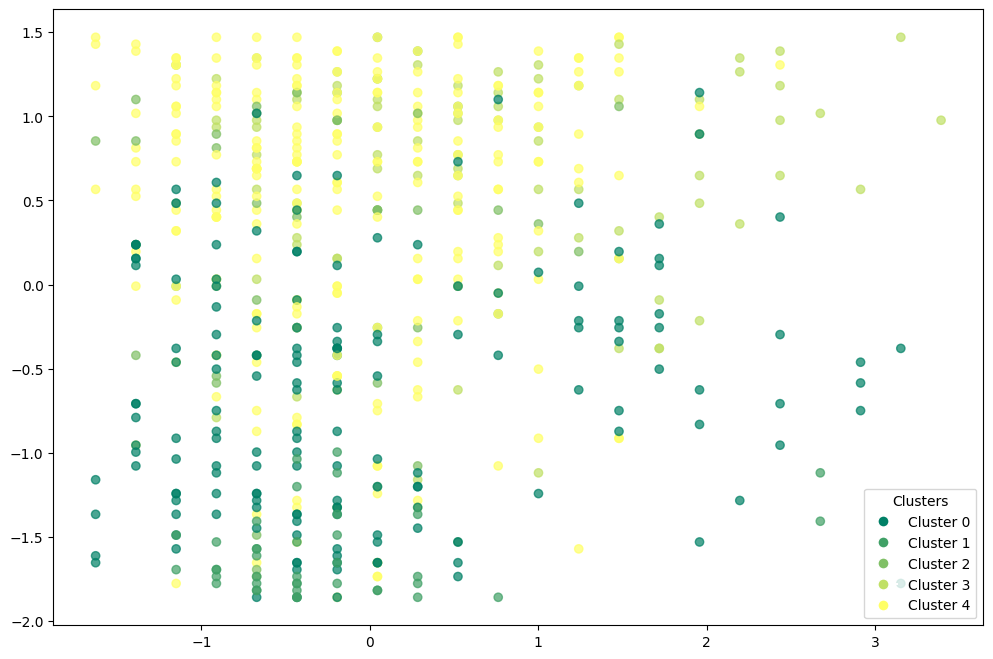

In [739]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_birch.iloc[:, 0], df_birch.iloc[:, 1], 
                      c=df_birch['birch'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_birch['birch'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### Birch with pca

In [740]:
birch_pca = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [741]:
birch_pca.fit(X_pca)

Birch(n_clusters=5, threshold=1.5)

In [742]:
df_pca_birch = nba_scaled.copy()

In [743]:
df_pca_birch["birch_pca"] = birch_pca.labels_

In [744]:
df_pca_birch

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  birch_pca  
0    2.373533  2.450903  1.472692  0.859607  3.628630          0  
1    2.428543  0.549657  1.966191  0.990703  3.278153          0  
2    4.463898  2.688559  0.485693  0.990703  3.156248          0  
3    3.088658  2.688559 -0.007806  1.252893  2.942914          0  
4    1.328351  1.262625  0.485693  0.466321  2.851485          0  
..        ...       ...       ...       ...       ...        ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239          4  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239          4  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239          4  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239          4  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239          4  

[569 rows x 13 columns]

### Birch with t-SNE

In [745]:
birch_tsne = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [746]:
birch_tsne.fit(X_tsne)

Birch(n_clusters=5, threshold=1.5)

In [747]:
df_tsne_birch = nba_scaled.copy()

In [748]:
df_tsne_birch['birch_tsne'] = birch_tsne.labels_

In [749]:
df_tsne_birch

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  birch_tsne  
0    2.373533  2.450903  1.472692  0.859607  3.628630           1  
1    2.428543  0.549657  1.966191  0.990703  3.278153           1  
2    4.463898  2.688559  0.485693  0.990703  3.156248           1  
3    3.088658  2.688559 -0.007806  1.252893  2.942914           1  
4    1.328351  1.262625  0.485693  0.466321  2.851485           1  
..        ...       ...       ...       ...       ...         ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239           4  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239           4  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239           4  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239           4  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239           4  

[569 rows x 13 columns]

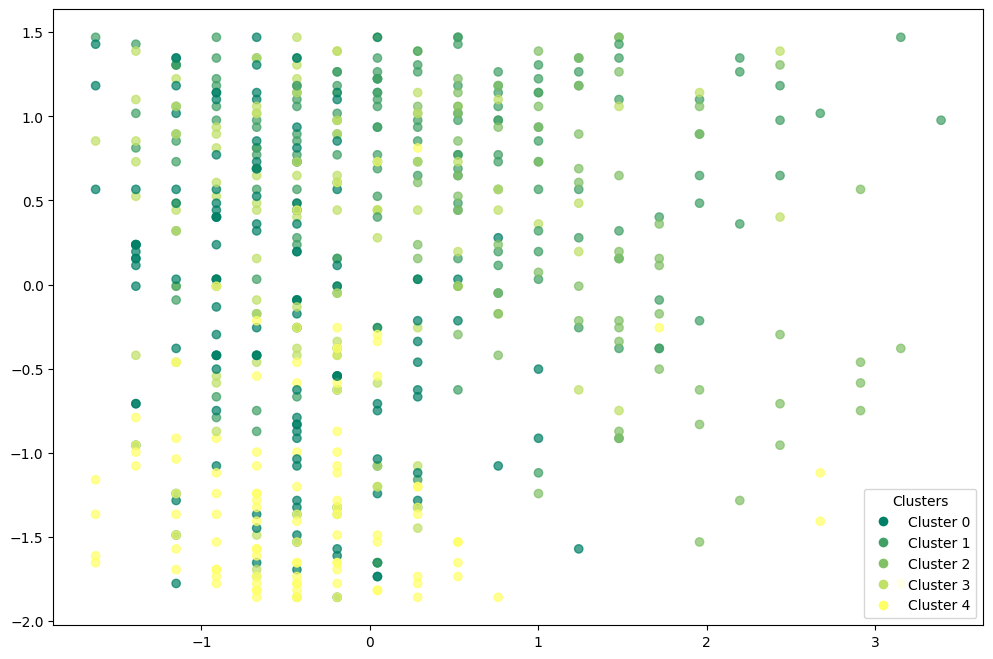

In [750]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_birch.iloc[:, 0], df_tsne_birch.iloc[:, 1], 
                      c=df_tsne_birch['birch_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_birch['birch_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### Birch with umap

In [751]:
birch_umap = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [752]:
birch_umap.fit(X_umap)

Birch(n_clusters=5, threshold=1.5)

In [753]:
df_umap_birch = nba_scaled.copy()

In [754]:
df_umap_birch['birch_umap'] = birch_umap.labels_

In [755]:
df_umap_birch

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  birch_umap  
0    2.373533  2.450903  1.472692  0.859607  3.628630           4  
1    2.428543  0.549657  1.966191  0.990703  3.278153           4  
2    4.463898  2.688559  0.485693  0.990703  3.156248           4  
3    3.088658  2.688559 -0.007806  1.252893  2.942914           4  
4    1.328351  1.262625  0.485693  0.466321  2.851485           4  
..        ...       ...       ...       ...       ...         ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239           0  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239           0  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239           0  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239           0  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239           0  

[569 rows x 13 columns]

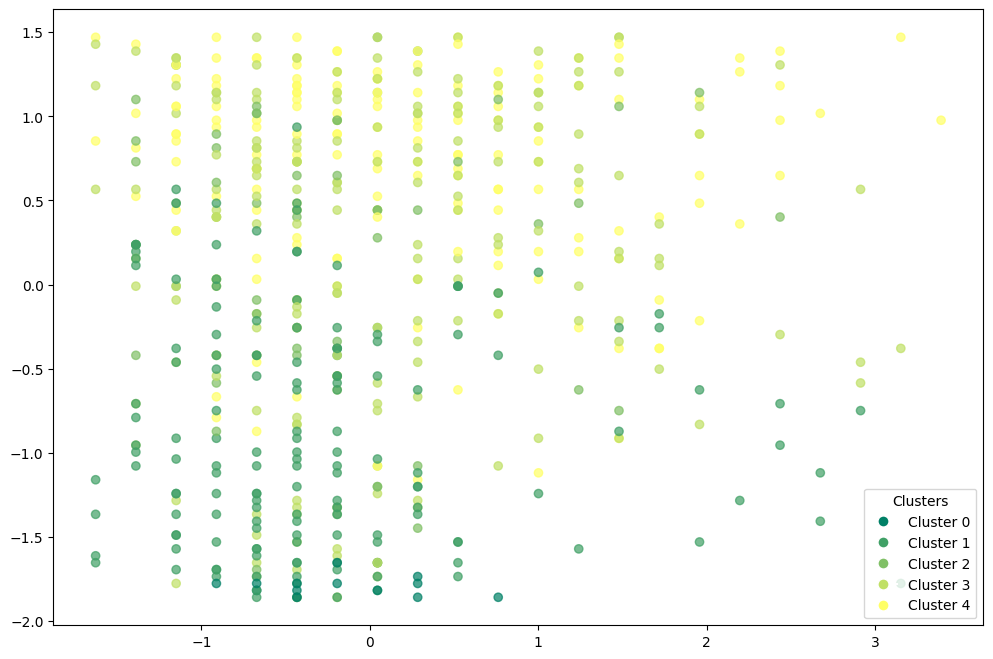

In [756]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_birch.iloc[:, 0], df_umap_birch.iloc[:, 1], 
                      c=df_umap_birch['birch_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_birch['birch_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

## GMM - Gaussian Mixture Models

In [757]:
gmm = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [758]:
gmm.fit(nba_scaled)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [759]:
df_gmm = nba_scaled.copy()

In [760]:
df_gmm['gmm'] = gmm.predict(nba_scaled)

In [761]:
df_gmm

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  gmm  
0    2.373533  2.450903  1.472692  0.859607  3.628630    2  
1    2.428543  0.549657  1.966191  0.990703  3.278153    2  
2    4.463898  2.688559  0.485693  0.990703  3.156248    2  
3    3.088658  2.688559 -0.007806  1.252893  2.942914    2  
4    1.328351  1.262625  0.485693  0.466321  2.851485    2  
..        ...       ...       ...       ...       ...  ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239    4  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239    4  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239    4  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239    4  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239    4  

[569 rows x 13 columns]

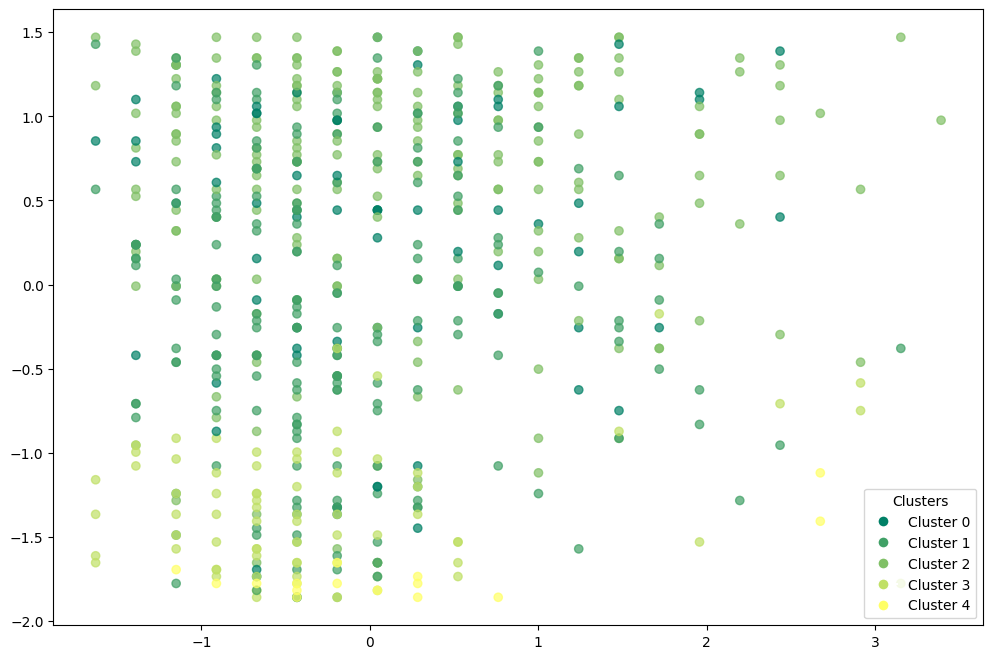

In [762]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### GMM with pca

In [763]:
gmm_pca = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [764]:
gmm_pca.fit(X_pca)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [765]:
df_pca_gmm = nba_scaled.copy()

In [766]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [767]:
df_pca_gmm

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  gmm_pca  
0    2.373533  2.450903  1.472692  0.859607  3.628630        2  
1    2.428543  0.549657  1.966191  0.990703  3.278153        0  
2    4.463898  2.688559  0.485693  0.990703  3.156248        0  
3    3.088658  2.688559 -0.007806  1.252893  2.942914        2  
4    1.328351  1.262625  0.485693  0.466321  2.851485        2  
..        ...       ...       ...       ...       ...      ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239        4  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239        4  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239        4  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239        4  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239        4  

[569 rows x 13 columns]

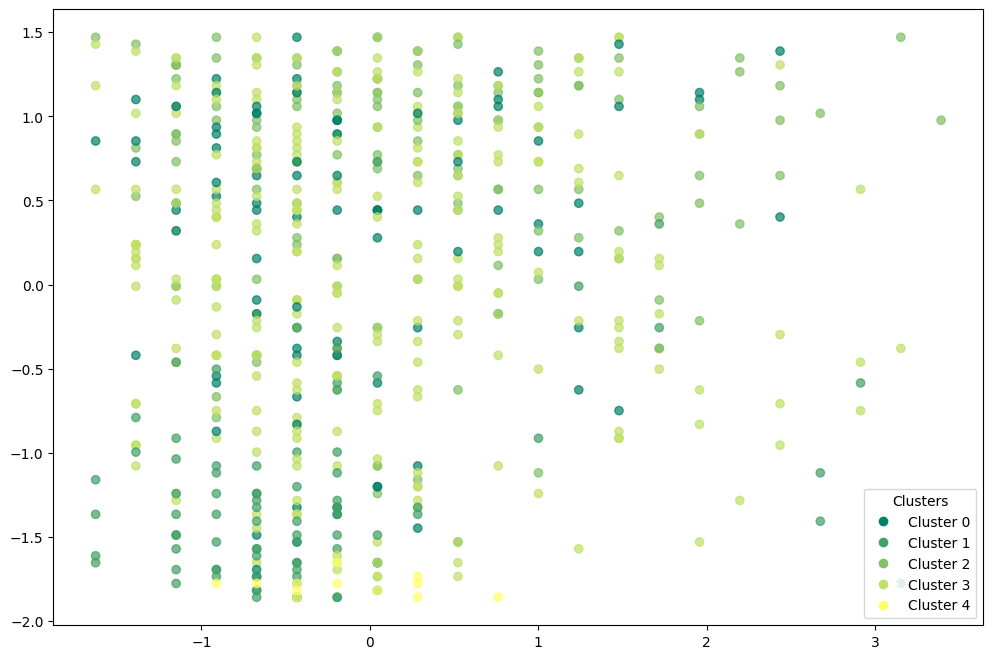

In [768]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### GMM with t-SNE

In [769]:
gmm_tsne = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [770]:
gmm_tsne.fit(X_tsne)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [771]:
df_tsne_gmm = nba_scaled.copy()

In [772]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [773]:
df_tsne_gmm

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  gmm_tsne  
0    2.373533  2.450903  1.472692  0.859607  3.628630         4  
1    2.428543  0.549657  1.966191  0.990703  3.278153         4  
2    4.463898  2.688559  0.485693  0.990703  3.156248         4  
3    3.088658  2.688559 -0.007806  1.252893  2.942914         4  
4    1.328351  1.262625  0.485693  0.466321  2.851485         4  
..        ...       ...       ...       ...       ...       ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239         3  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239         3  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239         3  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239         3  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239         3  

[569 rows x 13 columns]

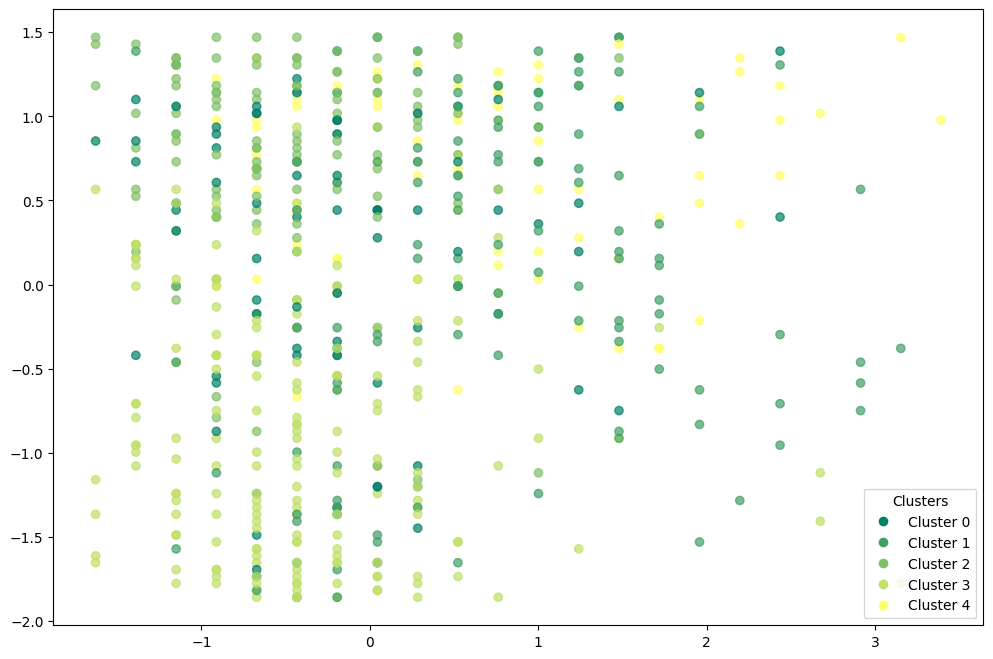

In [774]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### GMM with umap

In [775]:
gmm_umap = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [776]:
gmm_umap.fit(X_umap)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [777]:
df_umap_gmm = nba_scaled.copy()

In [778]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [779]:
df_umap_gmm

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  gmm_umap  
0    2.373533  2.450903  1.472692  0.859607  3.628630         2  
1    2.428543  0.549657  1.966191  0.990703  3.278153         2  
2    4.463898  2.688559  0.485693  0.990703  3.156248         2  
3    3.088658  2.688559 -0.007806  1.252893  2.942914         2  
4    1.328351  1.262625  0.485693  0.466321  2.851485         2  
..        ...       ...       ...       ...       ...       ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239         3  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239         3  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239         3  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239         3  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239         3  

[569 rows x 13 columns]

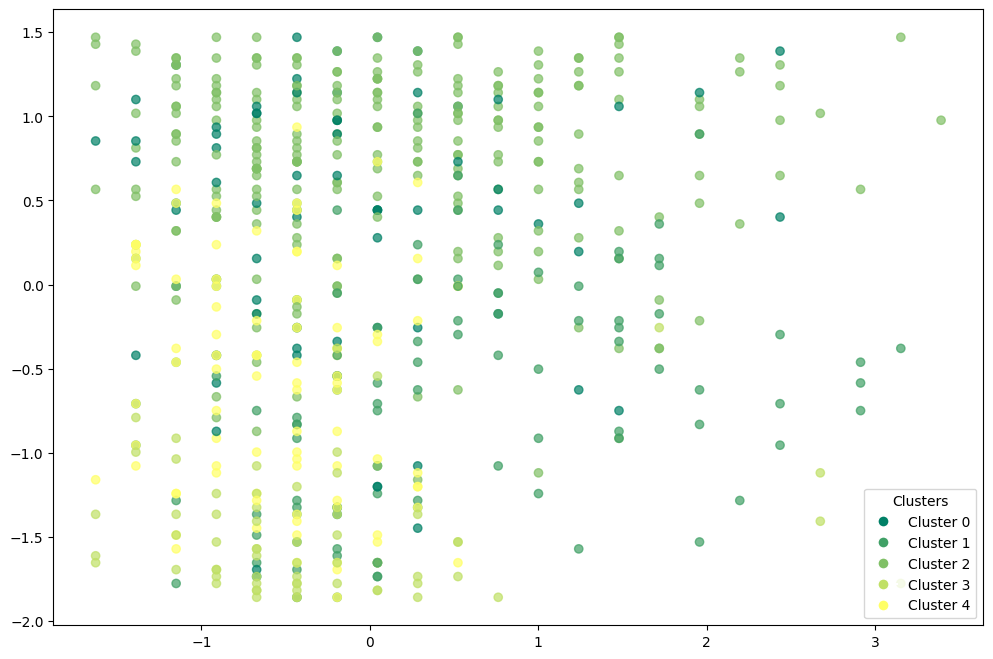

In [780]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

## pam

In [781]:
initial_medoids = np.random.choice(len(nba_scaled),5,replace=False)

In [782]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [783]:
pam = kmedoids(nba_scaled.values.tolist(),initial_medoids,metric=metric)

In [784]:
pam.process()

In [785]:
clusters = pam.get_clusters()

In [786]:
medoids = pam.get_medoids()

In [787]:
labels = np.zeros(len(nba_scaled))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [788]:
df_pam = nba_scaled.copy()

In [789]:
df_pam['pam'] = labels

In [790]:
df_pam

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  pam  
0    2.373533  2.450903  1.472692  0.859607  3.628630  4.0  
1    2.428543  0.549657  1.966191  0.990703  3.278153  4.0  
2    4.463898  2.688559  0.485693  0.990703  3.156248  4.0  
3    3.088658  2.688559 -0.007806  1.252893  2.942914  4.0  
4    1.328351  1.262625  0.485693  0.466321  2.851485  4.0  
..        ...       ...       ...       ...       ...  ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239  0.0  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239  0.0  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239  0.0  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239  0.0  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239  0.0  

[569 rows x 13 columns]

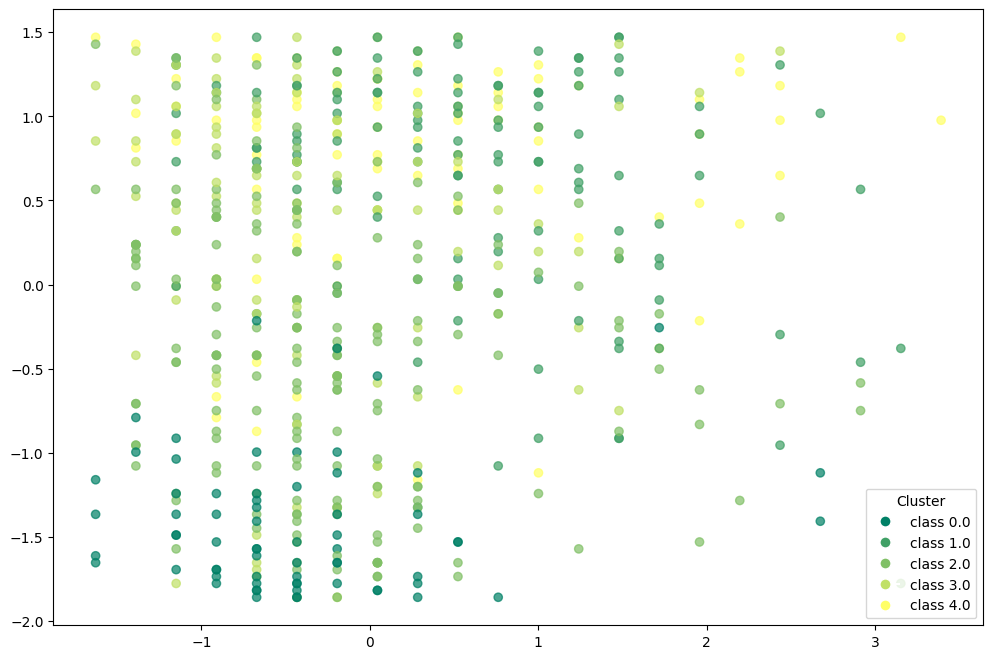

In [791]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

### pam with pca

In [792]:
initial_medoids = np.random.choice(len(X_pca),5,replace=False)

In [793]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [794]:
pam_pca = kmedoids(X_pca,initial_medoids,metric=metric)

In [795]:
pam_pca.process()

In [796]:
clusters = pam_pca.get_clusters()

In [797]:
medoids = pam_pca.get_medoids()

In [798]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [799]:
df_pam_pca = nba_scaled.copy()

In [800]:
df_pam_pca['pam_pca'] = labels

In [801]:
df_pam_pca

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  pam_pca  
0    2.373533  2.450903  1.472692  0.859607  3.628630      1.0  
1    2.428543  0.549657  1.966191  0.990703  3.278153      1.0  
2    4.463898  2.688559  0.485693  0.990703  3.156248      1.0  
3    3.088658  2.688559 -0.007806  1.252893  2.942914      1.0  
4    1.328351  1.262625  0.485693  0.466321  2.851485      1.0  
..        ...       ...       ...       ...       ...      ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239      4.0  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239      4.0  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239      4.0  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239      4.0  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239      4.0  

[569 rows x 13 columns]

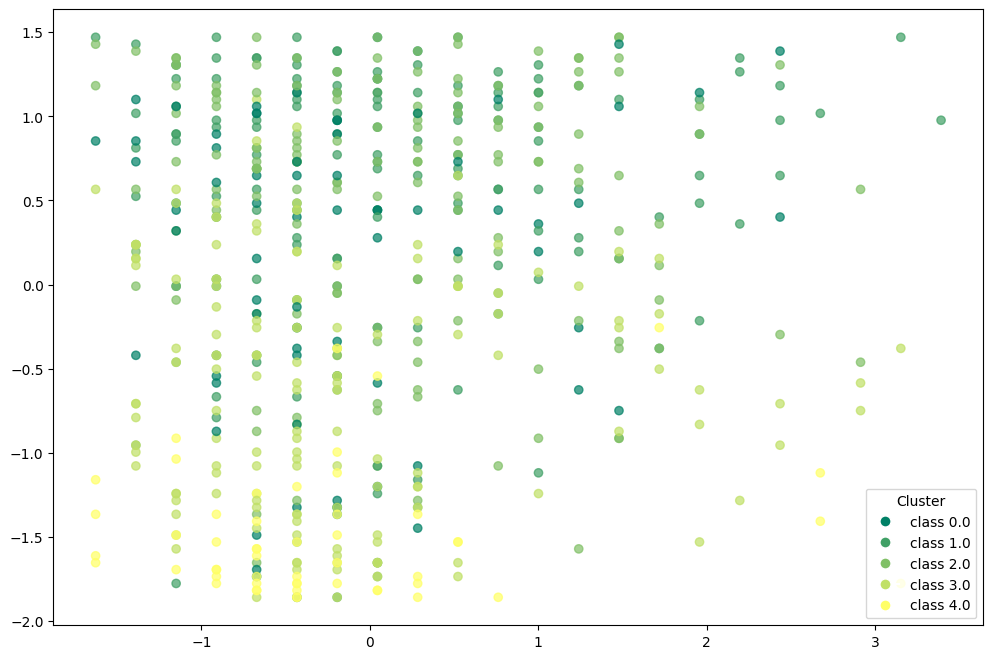

In [802]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

### pam with t-SNE

In [803]:
initial_medoids = np.random.choice(len(X_tsne),5,replace=False)

In [804]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [805]:
pam_tsne = kmedoids(X_tsne,initial_medoids,metric=metric)

In [806]:
pam_tsne.process()

In [807]:
clusters = pam_tsne.get_clusters()

In [808]:
medoids = pam_tsne.get_medoids()

In [809]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [810]:
df_pam_tsne = nba_scaled.copy()

In [811]:
df_pam_tsne['pam_tsne'] = labels

In [812]:
df_pam_tsne

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  pam_tsne  
0    2.373533  2.450903  1.472692  0.859607  3.628630       4.0  
1    2.428543  0.549657  1.966191  0.990703  3.278153       4.0  
2    4.463898  2.688559  0.485693  0.990703  3.156248       4.0  
3    3.088658  2.688559 -0.007806  1.252893  2.942914       4.0  
4    1.328351  1.262625  0.485693  0.466321  2.851485       4.0  
..        ...       ...       ...       ...       ...       ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239       0.0  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239       0.0  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239       0.0  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239       0.0  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239       0.0  

[569 rows x 13 columns]

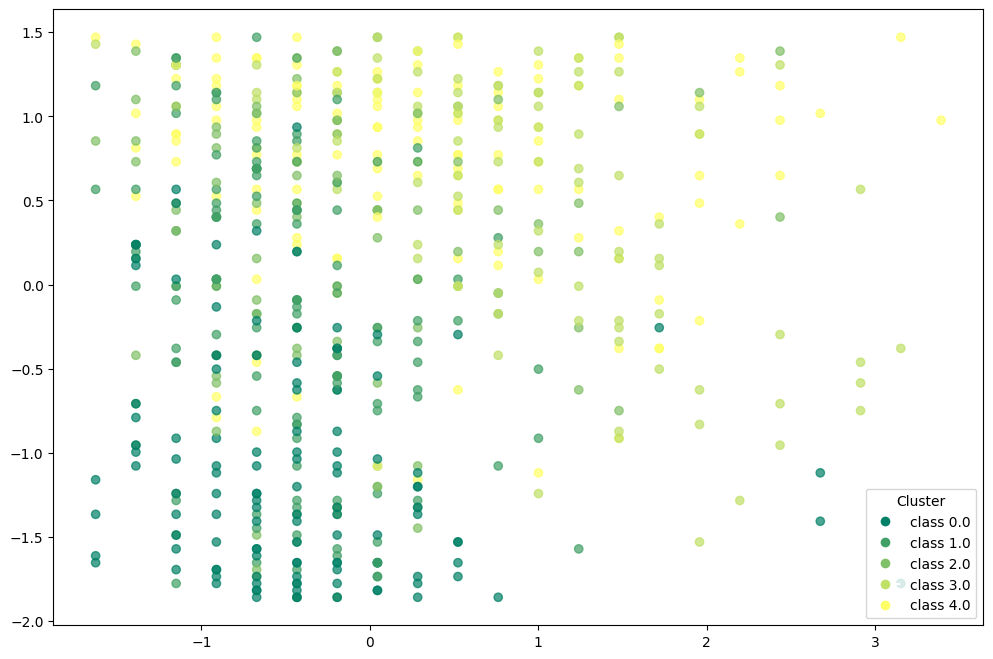

In [813]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

### pam with umap

In [814]:
initial_medoids = np.random.choice(len(X_umap),5,replace=False)

In [815]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [816]:
pam_umap = kmedoids(X_umap,initial_medoids,metric=metric)

In [817]:
pam_umap.process()

In [818]:
clusters = pam_umap.get_clusters()

In [819]:
medoids = pam_umap.get_medoids()

In [820]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [821]:
df_pam_umap = nba_scaled.copy()

In [822]:
df_pam_umap['pam_umap'] = labels

In [823]:
df_pam_umap

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  pam_umap  
0    2.373533  2.450903  1.472692  0.859607  3.628630       2.0  
1    2.428543  0.549657  1.966191  0.990703  3.278153       2.0  
2    4.463898  2.688559  0.485693  0.990703  3.156248       2.0  
3    3.088658  2.688559 -0.007806  1.252893  2.942914       2.0  
4    1.328351  1.262625  0.485693  0.466321  2.851485       2.0  
..        ...       ...       ...       ...       ...       ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239       4.0  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239       4.0  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239       4.0  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239       4.0  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239       4.0  

[569 rows x 13 columns]

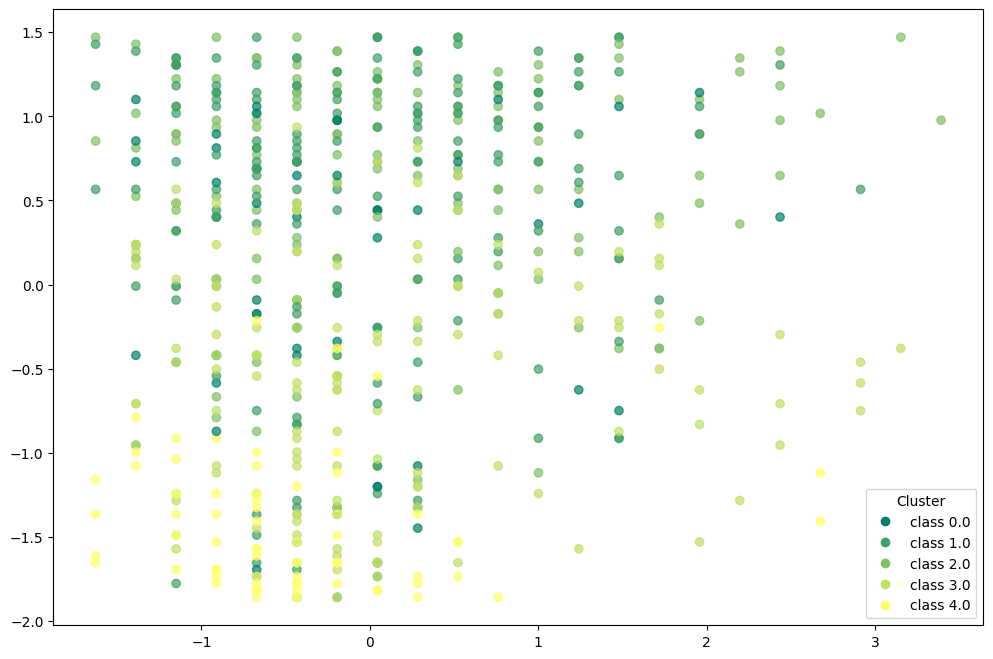

In [824]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

## spectral clustering

In [825]:
spectral_clustering = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [826]:
spectral_clustering.fit(nba_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [827]:
df_spectral = nba_scaled.copy()

In [828]:
df_spectral['spectral_clustering'] = spectral_clustering.labels_

In [829]:
df_spectral

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  spectral_clustering  
0    2.373533  2.450903  1.472692  0.859607  3.628630                    2  
1    2.428543  0.549657  1.966191  0.990703  3.278153                    2  
2    4.463898  2.688559  0.485693  0.990703  3.156248                    2  
3    3.088658  2.688559 -0.007806  1.252893  2.942914                    2  
4    1.328351  1.262625  0.485693  0.466321  2.851485                    2  
..        ...       ...       ...       ...       ...                  ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239                    4  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239                    4  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239                    4  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239                    4  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239                    4  

[569 rows x 13 columns]

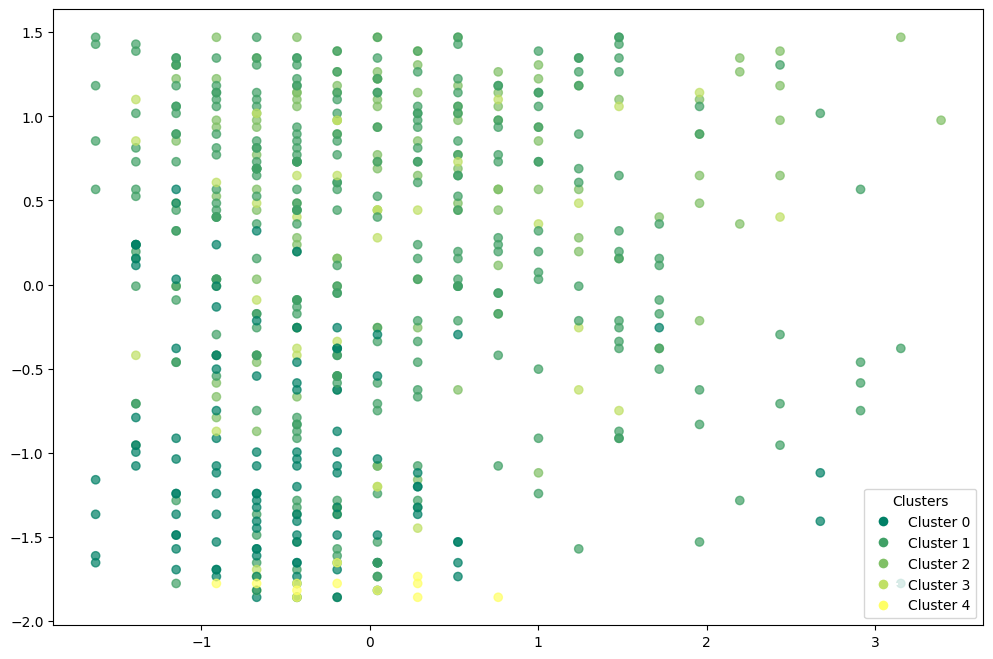

In [830]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_spectral.iloc[:, 0], df_spectral.iloc[:, 1], 
                      c=df_spectral['spectral_clustering'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_spectral['spectral_clustering'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### spectral clustering with pca

In [831]:
spectral_pca = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [832]:
spectral_pca.fit(X_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [833]:
df_pca_spectral = nba_scaled.copy()

In [834]:
df_pca_spectral["spectral_pca"] = spectral_pca.labels_

In [835]:
df_pca_spectral

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  spectral_pca  
0    2.373533  2.450903  1.472692  0.859607  3.628630             1  
1    2.428543  0.549657  1.966191  0.990703  3.278153             1  
2    4.463898  2.688559  0.485693  0.990703  3.156248             1  
3    3.088658  2.688559 -0.007806  1.252893  2.942914             1  
4    1.328351  1.262625  0.485693  0.466321  2.851485             1  
..        ...       ...       ...       ...       ...           ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239             3  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239             3  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239             3  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239             3  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239             3  

[569 rows x 13 columns]

### spectral clustering with t-SNE

In [836]:
spectral_tsne = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [837]:
spectral_tsne.fit(X_tsne)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [838]:
df_tsne_spectral = nba_scaled.copy()

In [839]:
df_tsne_spectral['spectral_tsne'] = spectral_tsne.labels_

In [840]:
df_tsne_spectral

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  spectral_tsne  
0    2.373533  2.450903  1.472692  0.859607  3.628630              1  
1    2.428543  0.549657  1.966191  0.990703  3.278153              1  
2    4.463898  2.688559  0.485693  0.990703  3.156248              1  
3    3.088658  2.688559 -0.007806  1.252893  2.942914              1  
4    1.328351  1.262625  0.485693  0.466321  2.851485              1  
..        ...       ...       ...       ...       ...            ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239              0  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239              0  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239              0  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239              0  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239              0  

[569 rows x 13 columns]

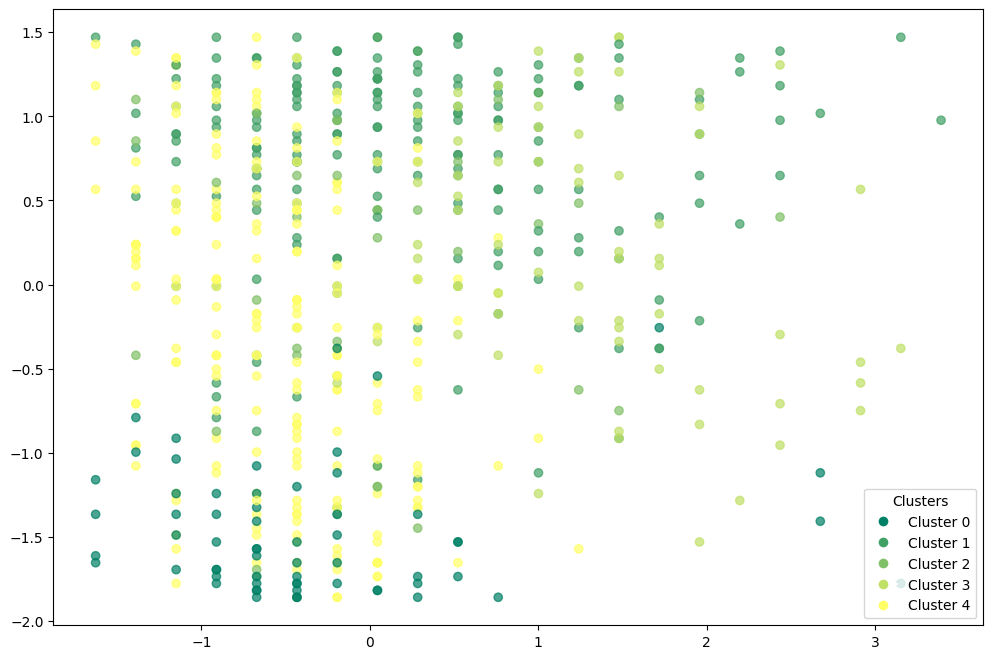

In [841]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['spectral_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_spectral['spectral_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### spectral clustering with umap

In [842]:
spectral_umap = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [843]:
spectral_umap.fit(X_umap)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [844]:
df_umap_spectral = nba_scaled.copy()

In [845]:
df_umap_spectral['spectral_umap'] = spectral_umap.labels_

In [846]:
df_umap_spectral

Age         G       FG%       3P%       2P%       FT%       TRB  \
0    0.045386  1.223223  0.636390  0.552000  0.398600  0.887690  0.580232   
1    1.001857  0.853396  1.352307 -0.559623  0.761533 -0.515561  3.430998   
2    0.762739  0.976672  1.134039  0.857152  0.813381  0.398300  3.761521   
3   -0.193732  0.154835  0.033971  0.501142  0.035667  0.308412  1.902326   
4   -0.671967  1.346499  0.007779  0.697311 -0.119876  0.583069  0.869440   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.432849 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -0.659232   
565  0.762739 -1.858666 -3.894842 -2.172568 -3.830680 -3.596720 -1.072386   
566 -0.671967 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.485541   
567 -0.432849 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.196333   
568 -0.193732 -1.776483 -3.894842 -2.172568 -3.830680 -3.596720 -1.361595   

          AST       STL       BLK        PF       PTS  spectral_umap  
0    2.373533  2.450903  1.472692  0.859607  3.628630              4  
1    2.428543  0.549657  1.966191  0.990703  3.278153              4  
2    4.463898  2.688559  0.485693  0.990703  3.156248              4  
3    3.088658  2.688559 -0.007806  1.252893  2.942914              4  
4    1.328351  1.262625  0.485693  0.466321  2.851485              4  
..        ...       ...       ...       ...       ...            ...  
564 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239              3  
565 -0.596985 -1.589245 -0.994804 -2.024489 -1.354239              3  
566 -1.147080 -1.589245 -0.994804 -2.024489 -1.354239              3  
567 -1.147080 -0.876277 -0.994804 -2.024489 -1.354239              3  
568 -0.762013 -1.589245 -0.994804 -2.024489 -1.354239              3  

[569 rows x 13 columns]

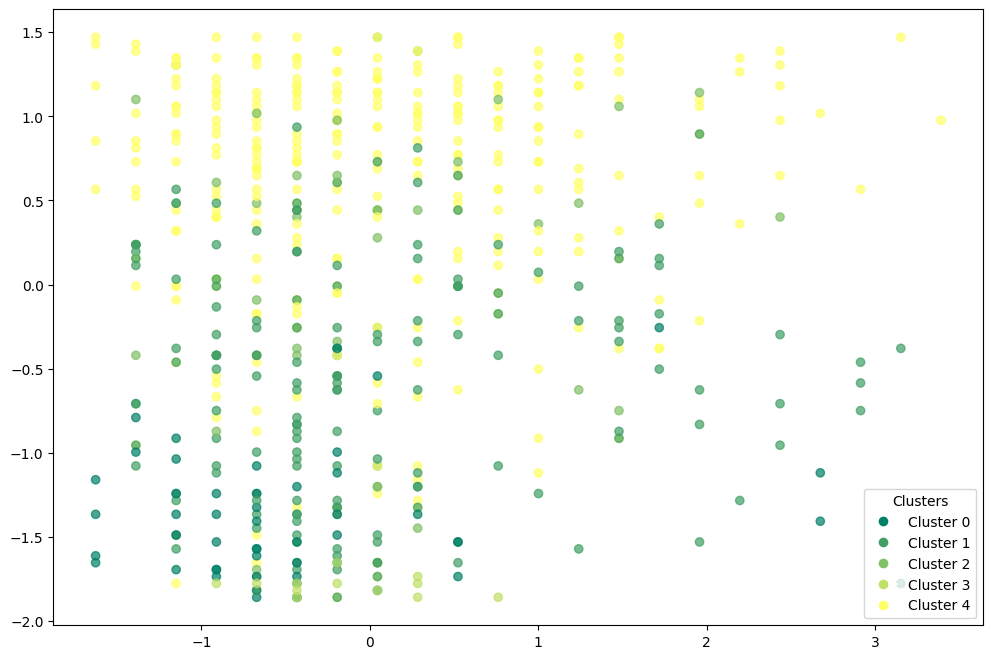

In [847]:
plt.figure(figsize=(12,8)) 
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['spectral_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_spectral['spectral_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()